In [1]:
# Blog : https://www.datacamp.com/community/tutorials/scikit-learn-fake-news

In [2]:
### Detecting fake news with Scikit-Learn
# The scikit-learn tutorial will walk you through building a
# fake news classifier with the help of Bayesian models.

In [5]:
# Import libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### Data Exploration

In [6]:
# import 'fake_or_real_news.csv'
df = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv")

# Inspect shape of 'df'
df.shape

# Print first lines of 'df'
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
# Set index
df = df.set_index("Unnamed: 0")

# Print first lines of 'df'
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
### Extracting Training Data

In [9]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Set 'y'
y = df['label']

# Drop the 'label' column
df.drop('label', axis = 1)

# Make training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size = 0.33, random_state = 53)

In [10]:
### Building Vectorizer Classifiers

In [11]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the 'count_vectorizer'
count_vectorizer = CountVectorizer(stop_words = 'english')

# Fit and transform the training data
count_train = count_vectorizer.fit_transform(X_train)

# Trasform the test set
count_test = count_vectorizer.transform(X_test)

In [14]:
# TFIDVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the 'tfidf_vectorizer'
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

# Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test set
tfidf_test = tfidf_vectorizer.transform(X_test)

In [15]:
# Get the feature names of 'tfidf_vectorizer'
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of 'count_vectorizer'
print(count_vectorizer.get_feature_names()[:10])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']
['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [16]:
# Intermezzo: Count versus TF-IDF Features
count_df = pd.DataFrame(count_train.A, columns = count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns = tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [17]:
print(count_df.equals(tfidf_df))

False


In [18]:
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
### Comparing Models

In [27]:
# Extra
from itertools import *
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy: , 0.857
Confusion matrix, without normalization


NameError: name 'itertools' is not defined

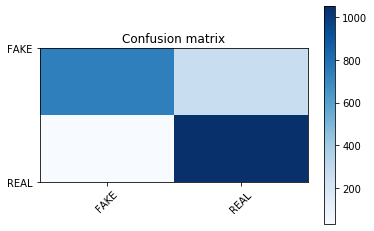

In [28]:
# Use Naive Bayes MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
clf = MultinomialNB()

clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy: , %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels = ['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL'])

In [29]:
### Testing Linear Models

accuracy: 0.934
Confusion matrix, without normalization


NameError: name 'itertools' is not defined

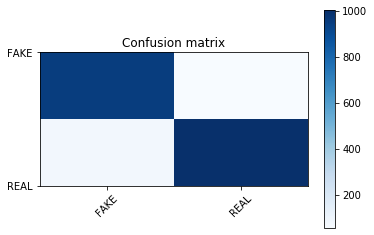

In [33]:
# import PassiveAggresiveClassifier()
from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier(max_iter = 50)

linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels = ['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL'])

In [34]:
### Parameter Tunining

In [35]:
clf = MultinomialNB(alpha = 0.1)

In [36]:
last_score = 0
for alpha in np.arange(0, 1, .1):
    nb_classifier = MultinomialNB(alpha = alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test, pred)
    if score > last_score:
        clg = nb_classifier
    print('Alpha: {:.2f} Score: {:.5f}'.format(alpha, score))

/Users/brijrajsinhgohil/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


In [37]:
### Introspecting Models

In [38]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n = 100):
    """
    See: StackOverflow
    
    """
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))
    
    for coef, feat in reversed(topn_class2):
        print(class_labels[0], coef, feat)
    
    print()
    
    for coef, feat in reversed(top_class2):
        print(class_labels[1], coef, feat)
        
most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n = 30)

FAKE 4.891832226714809 said
FAKE 2.7109303040345933 tuesday
FAKE 2.5887899407978705 says
FAKE 2.4673477112323794 gop
FAKE 2.461878965282335 cruz
FAKE 2.431882087656869 monday
FAKE 2.3434685428585 marriage
FAKE 2.331205296606628 islamic
FAKE 2.308685306511553 friday
FAKE 2.202021980652089 jobs
FAKE 2.188695603572177 candidates
FAKE 2.175482680554719 rush
FAKE 2.1189341507250354 convention
FAKE 2.0756026335319158 sen
FAKE 2.057981393851651 debate
FAKE 1.9868297961216221 attacks
FAKE 1.9719735395356017 continue
FAKE 1.8977673098651562 conservative
FAKE 1.866765399477222 presumptive
FAKE 1.8137809604423223 sunday
FAKE 1.7887621639268998 deal
FAKE 1.7779499438302924 recounts
FAKE 1.7635545422323258 march
FAKE 1.71301237770301 church
FAKE 1.6835204805152593 week
FAKE 1.6775243956385075 group
FAKE 1.6758438931265607 say
FAKE 1.6703679219755279 campaign
FAKE 1.6002596912715552 conservatives
FAKE 1.5813293826580836 paris
FAKE 1.578707661571959 attack
FAKE 1.578471748050125 reform
FAKE 1.5676175

FAKE 0.7334934919254877 korean
FAKE 0.7334208013905646 heer
FAKE 0.7334007936921783 pac
FAKE 0.7333851139568475 caldwell
FAKE 0.7324848631775868 facing
FAKE 0.731891676041863 months
FAKE 0.7317753736665683 administration
FAKE 0.7313792275291087 lack
FAKE 0.7313280548443106 questions
FAKE 0.7312953327330564 licenses
FAKE 0.730829981020862 succeeded
FAKE 0.7299512030406693 strongest
FAKE 0.7291897679561964 mauricio
FAKE 0.7291897679561964 macri
FAKE 0.728943445700755 setting
FAKE 0.7289327041615549 hadi
FAKE 0.7280439722331583 breath
FAKE 0.7277523036716513 children
FAKE 0.7262545479434107 shutdown
FAKE 0.7260319487354168 women
FAKE 0.7251223141330045 mccain
FAKE 0.7244871175176202 maher
FAKE 0.7242434662380451 lukin
FAKE 0.7232039241666353 tweets
FAKE 0.7231361920855968 chafee
FAKE 0.7222106515582379 mccarthy
FAKE 0.7220429318224826 democrat
FAKE 0.7209015252288293 appointed
FAKE 0.7207362516515889 killers
FAKE 0.7178591912289144 phrase
FAKE 0.7172385637923556 millennials
FAKE 0.7171903

FAKE 0.5321334461126466 fighter
FAKE 0.5318336913592313 turness
FAKE 0.531459779198701 jorgeson
FAKE 0.531240224693022 sanford
FAKE 0.5297828405209678 turkey
FAKE 0.5292591303986987 pageants
FAKE 0.529247097896746 scalia
FAKE 0.5288491978151545 ties
FAKE 0.5287624736955098 repeatedly
FAKE 0.5287130010449345 detainees
FAKE 0.5286258388353817 avoiding
FAKE 0.5286173621801359 feature
FAKE 0.5284803549126955 courses
FAKE 0.5272209215125515 inclined
FAKE 0.5271574252557073 wage
FAKE 0.5269568279429625 shiite
FAKE 0.5261030210008747 lifted
FAKE 0.5251066808621723 cripple
FAKE 0.5248130274553555 certain
FAKE 0.5245049248591561 brinkmanship
FAKE 0.5239654182238315 cuba
FAKE 0.523544551478756 schlafly
FAKE 0.5234932730669856 new
FAKE 0.5232551397669005 phenomenon
FAKE 0.5229743263353517 handful
FAKE 0.522923354741741 advisers
FAKE 0.522859523700676 overhaul
FAKE 0.5227064626788263 bashar
FAKE 0.5221046131975553 supreme
FAKE 0.5220922886644206 argentina
FAKE 0.521638581552822 popular
FAKE 0.5212

FAKE 0.4425749204805931 exchange
FAKE 0.44249682872342866 inversions
FAKE 0.44246789965108013 wave
FAKE 0.4421113242755897 patriots
FAKE 0.4419439626231216 processed
FAKE 0.4418960350571567 journalism
FAKE 0.44185864261528385 favorably
FAKE 0.4418137242680018 proposal
FAKE 0.441791267275132 warnings
FAKE 0.44176781344109817 bipartisan
FAKE 0.4414915897074954 forcefully
FAKE 0.44115282607736134 roughly
FAKE 0.44103231359249706 bar
FAKE 0.44065679578031236 arming
FAKE 0.44060827188587204 writers
FAKE 0.43984185178738144 guzman
FAKE 0.439762700307254 subject
FAKE 0.43972172939863885 todd
FAKE 0.43957696926135703 fence
FAKE 0.4395142845309073 strikes
FAKE 0.4390666637904544 altercations
FAKE 0.4386677364778549 demagogue
FAKE 0.43853347865213277 mental
FAKE 0.4382533893461268 jihadi
FAKE 0.4379295697056564 disqualify
FAKE 0.43788086220279643 equal
FAKE 0.43713809461066155 sonny
FAKE 0.4370818269050196 criticism
FAKE 0.43659486797333824 hardy
FAKE 0.43639843697311603 responsibility
FAKE 0.43

FAKE 0.362589774739478 heavily
FAKE 0.36212173311902257 sestanovich
FAKE 0.36212173311902257 lukyanov
FAKE 0.3620589513119231 noaa
FAKE 0.361949808929245 prolific
FAKE 0.361948613497943 jindal
FAKE 0.36183834680667404 majority
FAKE 0.36176333944876 liotta
FAKE 0.3617528478481068 persona
FAKE 0.3616698387323048 helped
FAKE 0.36154087958246306 infiltrating
FAKE 0.3613762613826402 bread
FAKE 0.3611850656651914 silence
FAKE 0.3609588427604578 fade
FAKE 0.3608969211030399 earn
FAKE 0.3608759987980541 legislative
FAKE 0.36061253898202916 racially
FAKE 0.36045143021340137 french
FAKE 0.3604209187520494 confront
FAKE 0.36041503423835664 lewis
FAKE 0.3602426034570694 bernie
FAKE 0.3600718086600541 naacp
FAKE 0.36001727394030264 understands
FAKE 0.35999181311041994 overtime
FAKE 0.3597021573196056 watched
FAKE 0.35952130635301977 9268
FAKE 0.3593557226621015 floor
FAKE 0.35927042843721707 requested
FAKE 0.3591858409531007 lean
FAKE 0.3589399299977135 montana
FAKE 0.358664339038544 training
FAKE 

FAKE 0.31169886245121825 nuns
FAKE 0.31166089692863014 joke
FAKE 0.3116537729396576 reluctant
FAKE 0.31160583741902964 fixing
FAKE 0.3114815372525571 800
FAKE 0.3114371371450606 launch
FAKE 0.3113936682066441 blackness
FAKE 0.3113166020721951 elevate
FAKE 0.31119435295131176 depot
FAKE 0.31102258355134715 sentences
FAKE 0.31097836605951545 biologics
FAKE 0.31092794345944236 manger
FAKE 0.31092794345944236 fearlessly
FAKE 0.3106317676797939 bemoaned
FAKE 0.3105525557485402 practical
FAKE 0.310527192234046 conclude
FAKE 0.31048572011683273 scored
FAKE 0.3104075819142842 commissions
FAKE 0.31008489543711687 panther
FAKE 0.31008286238465144 heineken
FAKE 0.31000138805425165 marketplaces
FAKE 0.3099007454211841 regarded
FAKE 0.3098710293948035 boundaries
FAKE 0.30984447929043873 cnbc
FAKE 0.30984337773359505 independents
FAKE 0.30980833131515717 marketing
FAKE 0.3095219024394221 sporadic
FAKE 0.3094884296765111 2030
FAKE 0.3094654686029869 half
FAKE 0.3094571780120846 attackers
FAKE 0.30939

FAKE 0.27375091949562 borrowers
FAKE 0.27374342808432706 does
FAKE 0.27372256718230376 institution
FAKE 0.27350556533576187 apply
FAKE 0.27338803310140647 distant
FAKE 0.27333197313547913 rouse
FAKE 0.2733289496263091 93
FAKE 0.2733090075932769 pandemic
FAKE 0.27321003473936134 walked
FAKE 0.2731988120699894 boomer
FAKE 0.2731477111355216 disproportionate
FAKE 0.2731418745447491 freemason
FAKE 0.27310126459156003 mcmahon
FAKE 0.2729544029314819 clearance
FAKE 0.27290123901095276 sab
FAKE 0.2728887940579953 burkean
FAKE 0.2728724627821353 weighted
FAKE 0.27249276078823936 returned
FAKE 0.2724798643989444 lynching
FAKE 0.2724514175492634 ashton
FAKE 0.27243019598713625 memories
FAKE 0.27242000858273585 folks
FAKE 0.2723804094272871 looked
FAKE 0.27226316063491324 hopeful
FAKE 0.2722061410086937 unimportant
FAKE 0.2719229253970022 girding
FAKE 0.2715980885666872 dramatically
FAKE 0.2715664601657425 stuff
FAKE 0.27151914978684366 honest
FAKE 0.27151229750381023 breach
FAKE 0.27145255459814

FAKE 0.24688234962170943 anointing
FAKE 0.2468301947662791 ashworth
FAKE 0.2468038693217632 era
FAKE 0.2467192644529581 publisher
FAKE 0.2467020001384146 substantial
FAKE 0.24666588777562118 explainer
FAKE 0.246636669746488 anthropologist
FAKE 0.2465802078517077 afl
FAKE 0.24653465991089524 bag
FAKE 0.24641864207539713 receded
FAKE 0.24628678058017126 nails
FAKE 0.2462570992098887 faced
FAKE 0.24607955517046382 husted
FAKE 0.24606129522473538 mishandled
FAKE 0.24602760516518646 idle
FAKE 0.24598477510692557 michigan
FAKE 0.2457871241578944 verses
FAKE 0.2457513525593845 paced
FAKE 0.2457078935253163 fuzzy
FAKE 0.24560613458438657 incentive
FAKE 0.2455974942096857 ocean
FAKE 0.24558223390975636 downplay
FAKE 0.24541116596234194 ehman
FAKE 0.24529813568290182 ftc
FAKE 0.24528648842584833 heads
FAKE 0.24517043863798416 contemporary
FAKE 0.24512895351046865 studying
FAKE 0.2451198050406343 ailment
FAKE 0.2450332720591438 esquire
FAKE 0.2449759316524653 sleeve
FAKE 0.24496451879937645 danie

FAKE 0.22135494551013857 nasdaq
FAKE 0.22116257438180442 indicating
FAKE 0.2210208341702343 scales
FAKE 0.22098202846720943 sponsors
FAKE 0.22081165099189726 producing
FAKE 0.22076311424691664 thinks
FAKE 0.2207565143759491 prague
FAKE 0.22069511570658978 detractors
FAKE 0.2206179863992886 electricity
FAKE 0.22059776252500482 zippers
FAKE 0.2204975675171205 hassana
FAKE 0.22033729963321103 disappearance
FAKE 0.22032603225796796 multimedia
FAKE 0.22029035933903632 potarazu
FAKE 0.22003031565960368 contributing
FAKE 0.2200017343630879 identify
FAKE 0.21992653054799235 usatoday
FAKE 0.21990201711165272 inputting
FAKE 0.21990201711165272 blackberries
FAKE 0.21987354319867455 badly
FAKE 0.21983625041099436 isolationist
FAKE 0.21968410478119765 osnos
FAKE 0.21966236351806545 trafficked
FAKE 0.21951251420494433 suburb
FAKE 0.2195113751919217 hurting
FAKE 0.21947052701032319 annexed
FAKE 0.21930904652687058 fairvote
FAKE 0.21925360553743067 shutter
FAKE 0.219240431516054 hire
FAKE 0.2191723612

FAKE 0.20170763216797394 inching
FAKE 0.20170267946607007 floated
FAKE 0.20163884714970404 cafeterias
FAKE 0.20159973847742838 istanbul
FAKE 0.20152897842091427 bulk
FAKE 0.20141424915307077 joins
FAKE 0.20140116038481273 nev
FAKE 0.20133992939358697 siphoning
FAKE 0.20124109294459866 northeastern
FAKE 0.20107880328939323 bids
FAKE 0.20106184823933484 rampaging
FAKE 0.20105675204714873 downs
FAKE 0.20100336320534695 victimized
FAKE 0.20088769566065834 lowest
FAKE 0.2008576025087026 blechman
FAKE 0.20085438230539515 scene
FAKE 0.20085182601954124 gonzalo
FAKE 0.2008119251309708 vulgar
FAKE 0.2007728235105809 beneficiaries
FAKE 0.2007605372431387 courted
FAKE 0.2007006848340991 jordanian
FAKE 0.20066693075169162 virtual
FAKE 0.20048038763462314 ratified
FAKE 0.2002177688201331 solidarity
FAKE 0.20009578288769936 dhs
FAKE 0.1997832271904158 implausible
FAKE 0.19966880283738195 virtues
FAKE 0.19962537584231752 large
FAKE 0.19951735474462312 appliedtechonomics
FAKE 0.19949041169077672 meats

FAKE 0.18677362535207634 lapointe
FAKE 0.1867129012526379 underscores
FAKE 0.1867032336317143 translator
FAKE 0.18658369476508707 chaotic
FAKE 0.18654912214274127 limiting
FAKE 0.18652918949485017 laid
FAKE 0.18650668527189232 curbs
FAKE 0.18650419331531237 hooverwhalen
FAKE 0.18650419331531237 adayattheracesblog
FAKE 0.1864672133875232 duplicity
FAKE 0.18644941808403626 chapel
FAKE 0.18642686863995286 dead
FAKE 0.18639808335578495 inferno
FAKE 0.18633367449544247 pino
FAKE 0.18620750666924793 perceptions
FAKE 0.18606918117338953 defined
FAKE 0.1860676436783081 tweet
FAKE 0.18606741332898188 correspondingly
FAKE 0.18606215386867314 democracy
FAKE 0.1860384493294038 inherits
FAKE 0.18594192975222298 projection
FAKE 0.18588908401935678 wind
FAKE 0.1857210143710178 scrum
FAKE 0.18570365005067202 charlie
FAKE 0.18566935901204487 echoed
FAKE 0.18560273494819318 instruments
FAKE 0.18558765351937476 accords
FAKE 0.18558466656212388 wrongful
FAKE 0.1855831069830913 empathy
FAKE 0.1855173652120

FAKE 0.17245343502782073 dana
FAKE 0.1724296996237525 critiques
FAKE 0.17230694304244745 trending
FAKE 0.17230512148443664 gangs
FAKE 0.17229977864789467 pitched
FAKE 0.1722573346893383 glean
FAKE 0.1722573346893383 dicaprio
FAKE 0.1721872100001267 basin
FAKE 0.1721622296675718 battlegrounds
FAKE 0.17208758533520552 denunciations
FAKE 0.17206676162975446 analyzes
FAKE 0.17206589178981638 bind
FAKE 0.17203411223924114 underlying
FAKE 0.17201022923676804 awash
FAKE 0.17200816505889827 gatherers
FAKE 0.17200816505889827 clickbait
FAKE 0.1717450080145768 scripture
FAKE 0.17171678065256585 cousins
FAKE 0.17171482770169788 premiere
FAKE 0.17167530544430018 mikulski
FAKE 0.1716743601331 yemeni
FAKE 0.17166111596260927 monologue
FAKE 0.17161321521392597 billionaire
FAKE 0.1716057012493836 klan
FAKE 0.17158694367500096 bureaucratic
FAKE 0.17156180411752778 shabaab
FAKE 0.1715050355405529 142
FAKE 0.17147131613957908 adorns
FAKE 0.17142139174470117 instability
FAKE 0.17140293186152053 gimmicks
F

FAKE 0.1572541187213753 hb2
FAKE 0.15720431544870636 minimums
FAKE 0.1571958615943604 updated
FAKE 0.15718008054742497 hymn
FAKE 0.15714335429992252 moderator
FAKE 0.15712629964499417 unspeakable
FAKE 0.15707112745445104 cluelessness
FAKE 0.1570271762220092 robbed
FAKE 0.15702687524781372 reputation
FAKE 0.15699654782744776 weasel
FAKE 0.15698128641145406 misstating
FAKE 0.15695871884167875 litter
FAKE 0.1569053852776365 pcworld
FAKE 0.1569053852776365 fier
FAKE 0.1569053852776365 darktrace
FAKE 0.1568575324826201 eighth
FAKE 0.15682573226728902 expansive
FAKE 0.15681001213672546 towers
FAKE 0.15679597881610022 pissed
FAKE 0.15678756150290724 shelf
FAKE 0.1567686232916516 selected
FAKE 0.15676032539872373 nontrivial
FAKE 0.1567477235444449 embody
FAKE 0.15674276015845018 ghastly
FAKE 0.15672959529756703 retaliatory
FAKE 0.15669519744967816 deluded
FAKE 0.15667588799655033 vertigo
FAKE 0.15667588799655033 propositioning
FAKE 0.15667588799655033 firestorms
FAKE 0.15667588799655033 cashin

FAKE 0.14840382572754834 nagging
FAKE 0.1484030643937344 noisy
FAKE 0.14834977103058775 122
FAKE 0.14834766262989416 impersonation
FAKE 0.14833870575278985 candor
FAKE 0.1482726600312537 distinguished
FAKE 0.14827052302631683 rallying
FAKE 0.1482649555079965 gonna
FAKE 0.14817331760082325 kuwaiti
FAKE 0.14813446862695687 impose
FAKE 0.148079980431351 laissez
FAKE 0.148079980431351 faire
FAKE 0.1480584002522733 governments
FAKE 0.1479782675448482 jarrett
FAKE 0.1479442403483055 names
FAKE 0.1479294521677481 addressed
FAKE 0.1478494127419509 merchants
FAKE 0.14784409201640442 disengagement
FAKE 0.1478285983869372 gutted
FAKE 0.14779918712234882 emitters
FAKE 0.1477949433565579 interwebs
FAKE 0.14775886790675158 unattractive
FAKE 0.14775704818457838 outs
FAKE 0.14775086312016367 strongly
FAKE 0.1477505117769812 airman
FAKE 0.14775028694943462 pony
FAKE 0.14774779011247846 mansoor
FAKE 0.14763690735901563 obliged
FAKE 0.14761507153312864 dislodge
FAKE 0.14757344046229987 angles
FAKE 0.1475

FAKE 0.1381079190042837 detrick
FAKE 0.13810487645584169 juche
FAKE 0.1381005620704371 cameron
FAKE 0.13808892351363602 disparaging
FAKE 0.1380723708952228 sketchy
FAKE 0.13804503393793385 lavrov
FAKE 0.13793563682473692 conjecture
FAKE 0.13793050715061841 offended
FAKE 0.13791060563877774 cramming
FAKE 0.13789515111698636 resulted
FAKE 0.1378783243369036 combustible
FAKE 0.13786569557629244 landslide
FAKE 0.13783425635919488 tim
FAKE 0.13782573629968375 lace
FAKE 0.13781470748001884 1856
FAKE 0.13780782739586406 powerless
FAKE 0.1377974875042781 accusations
FAKE 0.13779655645901642 fidel
FAKE 0.13778149030976786 medina
FAKE 0.13776754021802862 publicised
FAKE 0.13774095387383917 smikle
FAKE 0.13774095387383917 borelli
FAKE 0.13769482225153973 ali
FAKE 0.13758643505462695 knitting
FAKE 0.13754113504459978 newsom
FAKE 0.13748641300122746 collects
FAKE 0.1374636421595634 kroger
FAKE 0.1374566437084592 acceding
FAKE 0.137400954103475 boyd
FAKE 0.13738274030265807 pagesix
FAKE 0.1373827403

FAKE 0.13136251559018514 apologizing
FAKE 0.13134785031117407 tango
FAKE 0.1313450583984846 derail
FAKE 0.13131688332649255 rural
FAKE 0.13131225897938753 haven
FAKE 0.13130154525216686 hurts
FAKE 0.13129212082656216 deneen
FAKE 0.13128413353423699 pathetic
FAKE 0.13125899256295312 numb
FAKE 0.1312487537754302 skeptics
FAKE 0.13122316021735247 swath
FAKE 0.13119093958601577 charms
FAKE 0.13115409312735832 resisting
FAKE 0.13105964178096538 advising
FAKE 0.13105592130812344 plausibly
FAKE 0.13103966396121836 surrogates
FAKE 0.13101019168520345 antiquated
FAKE 0.1309687134468953 shaped
FAKE 0.13092566774031236 sprigg
FAKE 0.13091097546347402 avail
FAKE 0.13078408153812093 dapa
FAKE 0.13077428310341094 lieberman
FAKE 0.130773096252081 branding
FAKE 0.13072509110429023 nrg
FAKE 0.13066224820061942 bets
FAKE 0.13060012596769574 tired
FAKE 0.13048969005032876 shouldering
FAKE 0.13042838012877012 sidelines
FAKE 0.13039498662179608 8962
FAKE 0.13039498662179608 1095
FAKE 0.13032695933171518 ci

FAKE 0.11878289563336211 gentile
FAKE 0.11878289563336211 childless
FAKE 0.11878289563336211 balk
FAKE 0.11873413698057057 rotate
FAKE 0.11866434480677132 gainfully
FAKE 0.11864000603009575 preached
FAKE 0.11862095538550893 lds
FAKE 0.11862095538550893 apostles
FAKE 0.11860825583188851 antithesis
FAKE 0.11858090749869525 defining
FAKE 0.11850558197165093 parenting
FAKE 0.11848328070227551 noting
FAKE 0.11847345859423693 guerrilla
FAKE 0.11847004484402542 theoretical
FAKE 0.1184454125150308 cigarettes
FAKE 0.11838871796603126 contrasting
FAKE 0.11825695846731858 grateful
FAKE 0.11824928295824069 morgue
FAKE 0.11824202736272084 minorities
FAKE 0.11823865873182512 lynch
FAKE 0.11820926823690754 hyper
FAKE 0.11814035790149241 instructor
FAKE 0.11808406284073497 hinged
FAKE 0.11807214394647603 unfolding
FAKE 0.1180625762501899 inmates
FAKE 0.11805982308167326 colonies
FAKE 0.11803176338984948 bubba
FAKE 0.11800923661469771 watchable
FAKE 0.11800923661469771 sitdown
FAKE 0.11800923661469771 

FAKE 0.11144206437957824 zeitzoff
FAKE 0.11144206437957824 chayut
FAKE 0.11136134606991496 contradictory
FAKE 0.11135991022769924 singled
FAKE 0.1113293000155836 description
FAKE 0.11131487715217821 restricted
FAKE 0.11125672691203264 capitulated
FAKE 0.11125534142602254 leanings
FAKE 0.11121819873181553 acquired
FAKE 0.11120394200923378 slaves
FAKE 0.11118839522464448 hopelessly
FAKE 0.11117911835924135 sketched
FAKE 0.11116864568120877 playing
FAKE 0.11111207359989868 youssef
FAKE 0.11107959266949109 shanghai
FAKE 0.11107526827155298 cautioned
FAKE 0.1110554540295378 citizenry
FAKE 0.11098619333487231 clocking
FAKE 0.11097995633049824 jacking
FAKE 0.1109334938107554 vanish
FAKE 0.11089672856109523 childhood
FAKE 0.11086810035376232 cubicle
FAKE 0.11086001090567067 yemenis
FAKE 0.11084564610000694 mehr
FAKE 0.1108447281885145 173
FAKE 0.11081751036766015 purposing
FAKE 0.11081334717286287 salience
FAKE 0.11080038697493805 salvador
FAKE 0.11076602108248468 internecine
FAKE 0.1107305403

FAKE 0.10485415770165143 duped
FAKE 0.10482460501085634 shaken
FAKE 0.10482101613505879 syed
FAKE 0.10481058460321246 lymphoma
FAKE 0.10481058460321246 hodgkin
FAKE 0.10480326071747686 safeguarding
FAKE 0.10479683643541991 debbie
FAKE 0.10477168744214276 flatly
FAKE 0.10474080548166359 kerner
FAKE 0.1047096172079342 classroom
FAKE 0.1047089102957512 enrollments
FAKE 0.10470813105580652 funeral
FAKE 0.10467547611182991 stiffs
FAKE 0.10467547611182991 smugly
FAKE 0.10467547611182991 prevarication
FAKE 0.10467547611182991 dilapidated
FAKE 0.10467547611182991 chieftains
FAKE 0.10465623463619267 presided
FAKE 0.10465419094096937 82nd
FAKE 0.10462149747001404 commonwealth
FAKE 0.10458340656259048 homebrew
FAKE 0.10455976046487492 mas
FAKE 0.10455487598740784 earning
FAKE 0.10454946529290467 retooled
FAKE 0.10450957939114919 askthegays
FAKE 0.10449228925193164 tagline
FAKE 0.10449228925193164 masculinitysofragile
FAKE 0.10449228925193164 hotness
FAKE 0.10449228925193164 cavemen
FAKE 0.1044922

FAKE 0.09880362371133847 owes
FAKE 0.0987898133505647 limbo
FAKE 0.09876136661647339 waist
FAKE 0.09875607344533127 antithetical
FAKE 0.09875373979660723 conciliatory
FAKE 0.098746069060368 advertiser
FAKE 0.09874602182692473 quipped
FAKE 0.098745727115362 racialized
FAKE 0.09869990089455837 adnani
FAKE 0.09868798348013218 gravitas
FAKE 0.0986129983132783 stumping
FAKE 0.09861150904906846 interwar
FAKE 0.09861150904906846 deferential
FAKE 0.09861150904906846 coinage
FAKE 0.09861150904906846 astound
FAKE 0.09861150904906846 apostate
FAKE 0.09861150904906846 1922
FAKE 0.09856918017438412 debtors
FAKE 0.09856918017438412 affluence
FAKE 0.09855597671297986 dumpster
FAKE 0.09855579098733504 peers
FAKE 0.09855081977529327 debut
FAKE 0.09852889477991462 sensitivity
FAKE 0.09852766911131697 zimring
FAKE 0.09852766911131697 fenelon
FAKE 0.09852766911131697 citylab
FAKE 0.09852766911131697 buehler
FAKE 0.09852034994264318 haunting
FAKE 0.09850752770250605 costco
FAKE 0.09850208558225082 lethal
F

FAKE 0.09312904895960032 proximity
FAKE 0.0931265448378528 unify
FAKE 0.09312071514540009 overran
FAKE 0.09311694174908827 squirrel
FAKE 0.09309961554279644 murdochs
FAKE 0.09308097606245344 beliefs
FAKE 0.09305002178990979 feelthebern
FAKE 0.09303708867609142 inanimate
FAKE 0.09302961423441153 mongolia
FAKE 0.0929970067073695 flopped
FAKE 0.09292479375821579 evaded
FAKE 0.09291777512853439 furnishings
FAKE 0.09287564158757408 motorcade
FAKE 0.09282538742353263 controversies
FAKE 0.09281842335037589 conducive
FAKE 0.09278039481763674 alongside
FAKE 0.09277371752987171 fanfare
FAKE 0.09276779565456275 fallujah
FAKE 0.09274555085701913 unorthodox
FAKE 0.09272675993307362 castration
FAKE 0.09270079621662262 nosed
FAKE 0.0926998931928766 hanlon
FAKE 0.09269128139684304 tablemate
FAKE 0.09269128139684304 melissafrancisfox
FAKE 0.09269128139684304 melissaafrancis
FAKE 0.09269128139684304 feasting
FAKE 0.0926784500727459 terry
FAKE 0.09264781586431246 cedar
FAKE 0.0926315558994798 devoted
FAK

FAKE 0.08740371757208587 microcephaly
FAKE 0.08739394270753602 fervently
FAKE 0.08734787712450272 subtle
FAKE 0.08732971559837681 sonia
FAKE 0.0873291826792599 cardin
FAKE 0.08729416825119837 soto
FAKE 0.08727852469904039 weary
FAKE 0.0872758510016876 cycling
FAKE 0.08726202486931457 broadwell
FAKE 0.08724976558563759 separates
FAKE 0.08724447574957589 vendettas
FAKE 0.08724447574957589 suborning
FAKE 0.08724447574957589 sublimation
FAKE 0.08724447574957589 cosmically
FAKE 0.08724447574957589 cavalcade
FAKE 0.08724447574957589 animating
FAKE 0.08722955652648835 wehrey
FAKE 0.08722955652648835 alterman
FAKE 0.08722829879118231 marley
FAKE 0.0872251269218854 guideline
FAKE 0.08712730904296166 toupee
FAKE 0.08712730904296166 theurgist
FAKE 0.08712730904296166 teras
FAKE 0.08712730904296166 semeion
FAKE 0.08712730904296166 retrospectively
FAKE 0.08712730904296166 partakes
FAKE 0.08712730904296166 nonphilosophical
FAKE 0.08712730904296166 naturalistically
FAKE 0.08712730904296166 multiverse

FAKE 0.08337429771604275 hang
FAKE 0.08330079801618726 objected
FAKE 0.08328968974269736 appeals
FAKE 0.0832369630676988 lived
FAKE 0.083222047478718 stoned
FAKE 0.083222047478718 steppenwolf
FAKE 0.083222047478718 pajama
FAKE 0.0832166119725866 eugene
FAKE 0.08320415132368683 sealed
FAKE 0.08319076338773072 homogeneous
FAKE 0.08316623935117747 intimidation
FAKE 0.08315981506890752 interjecting
FAKE 0.083113127835992 linguistic
FAKE 0.08304874917411341 gautier
FAKE 0.08302257423761214 berating
FAKE 0.08299072617595707 missy
FAKE 0.08298463731946479 indignities
FAKE 0.08298043779824116 rodden
FAKE 0.08298043779824116 ansolabehere
FAKE 0.08287558755023797 layer
FAKE 0.0828657280463275 neoplastic
FAKE 0.0828657280463275 medstar
FAKE 0.0828657280463275 deciliter
FAKE 0.08281710461202806 join
FAKE 0.08279970906113807 handkerchief
FAKE 0.08278925017819065 podcasts
FAKE 0.08277722552249167 breaching
FAKE 0.08275006018913411 crafty
FAKE 0.08274560216480817 platter
FAKE 0.08271477672814183 prea

FAKE 0.07871014353811864 intersperses
FAKE 0.07871014353811864 hemmed
FAKE 0.07871014353811864 hamastan
FAKE 0.07871014353811864 brisk
FAKE 0.07869187720963386 leaned
FAKE 0.0786781459106547 militiamen
FAKE 0.07865805376170087 algerian
FAKE 0.07864849021776948 disrepute
FAKE 0.07862816092383819 revolve
FAKE 0.07862396186988824 messrs
FAKE 0.0786025877594826 wistful
FAKE 0.0786025877594826 rothkopf
FAKE 0.07860189664830146 persuasion
FAKE 0.07859944519020484 shuddhikaran
FAKE 0.07859944519020484 relics
FAKE 0.0785634143264743 969
FAKE 0.07856251979284984 tack
FAKE 0.07853426261364412 nervously
FAKE 0.07853103766792473 facet
FAKE 0.07852085396576033 timeless
FAKE 0.07849363635673742 stiff
FAKE 0.07847967190970727 lock
FAKE 0.07846345718835722 zelizer
FAKE 0.078433737442892 fetched
FAKE 0.07842540123740213 swerves
FAKE 0.07838780547344339 toss
FAKE 0.0783563389591163 uphold
FAKE 0.07832763225304888 lutheran
FAKE 0.07831072242604294 exceedingly
FAKE 0.07829323437160676 glover
FAKE 0.078280

FAKE 0.07345324578056465 desmond
FAKE 0.07344588135807255 cathedral
FAKE 0.0734429259651511 tanked
FAKE 0.07343874282861705 community
FAKE 0.07342383315449702 seoul
FAKE 0.07341021277920216 miraculous
FAKE 0.0733515794882683 25m
FAKE 0.07334864582376917 surreal
FAKE 0.07332111938711545 hardships
FAKE 0.07332073755522162 413
FAKE 0.07329420943053118 707
FAKE 0.07328059465593964 protrusion
FAKE 0.07328059465593964 preopened
FAKE 0.07328059465593964 inexhaustible
FAKE 0.07328059465593964 butchering
FAKE 0.07328059465593964 althouse
FAKE 0.07326507405296498 afterward
FAKE 0.07325795903810911 txpep
FAKE 0.07323993406031325 kissed
FAKE 0.0732040253138651 scoundrel
FAKE 0.07320163121468416 pianist
FAKE 0.07317591687258762 skewering
FAKE 0.07317591687258762 essex
FAKE 0.07317164357030996 surefire
FAKE 0.07317043669472895 persisted
FAKE 0.07314282912889479 avenged
FAKE 0.07313631355701407 goad
FAKE 0.0731208835355147 flatter
FAKE 0.0731208835355147 credulity
FAKE 0.0731208835355147 admiring
FAK

FAKE 0.06913114945862633 fiancée
FAKE 0.06913114945862633 bestrides
FAKE 0.06911972892449937 kansas
FAKE 0.06906400732765244 squawk
FAKE 0.0690344917263179 disaffected
FAKE 0.06902701185050328 thefts
FAKE 0.06902539920347635 secured
FAKE 0.06900193029951125 savagery
FAKE 0.06899452759359934 lieu
FAKE 0.06899128405937072 resuscitate
FAKE 0.06897229159431337 annotated
FAKE 0.06895128668356851 quijano
FAKE 0.06895125988153922 satisfaction
FAKE 0.0689217847359993 terminal
FAKE 0.06891624701867226 abdel
FAKE 0.06888263342664246 whipping
FAKE 0.0688737880934414 music
FAKE 0.06887293964963101 amiable
FAKE 0.06883833243104047 manipulator
FAKE 0.0688315253458693 revolves
FAKE 0.06882796673029577 loved
FAKE 0.06880388611617579 cpl
FAKE 0.06880022341575799 sighs
FAKE 0.06877607298569768 alabama
FAKE 0.0687318210797817 rainmakers
FAKE 0.0687318210797817 milovan
FAKE 0.0687318210797817 hedrick
FAKE 0.0687318210797817 exploiters
FAKE 0.0687318210797817 djilas
FAKE 0.0687318210797817 diario
FAKE 0.06

FAKE 0.06519271412482136 lynchburg
FAKE 0.06513923119733067 annie
FAKE 0.06511500977844199 overstate
FAKE 0.06511276089415484 overview
FAKE 0.06511053305765499 unelectable
FAKE 0.0650838505364025 extradition
FAKE 0.06507708216185897 brochure
FAKE 0.06507131439971721 ges
FAKE 0.06505749565185535 aftershock
FAKE 0.06505016414508605 greatness
FAKE 0.06501696498762657 painstakingly
FAKE 0.06501657976570535 demote
FAKE 0.06501657976570535 axed
FAKE 0.06500221692307556 joyce
FAKE 0.06500140304807621 222
FAKE 0.0649881501605109 suppresses
FAKE 0.06494787439143938 debating
FAKE 0.06494164938267045 emailing
FAKE 0.06492542921799273 span
FAKE 0.06491940606563996 adhikari
FAKE 0.06489461678513483 shigeaki
FAKE 0.06485854435826742 pleasures
FAKE 0.06485854435826742 multigenerational
FAKE 0.06485028783634227 harboring
FAKE 0.06483262563518168 uprooted
FAKE 0.06482874769627545 jailing
FAKE 0.06479152229377041 multitude
FAKE 0.06476148392528992 assessing
FAKE 0.06475362959157997 prayers
FAKE 0.064729

FAKE 0.06163485447853603 raping
FAKE 0.06163026750246632 damnation
FAKE 0.06162972014855978 unlikeliest
FAKE 0.06162971166413536 leveraging
FAKE 0.0616122233089354 warmly
FAKE 0.06159131846008293 poignant
FAKE 0.06151962710566625 clintonian
FAKE 0.06147402763230021 foreground
FAKE 0.06146598018283349 dimmed
FAKE 0.06144795361212666 overboard
FAKE 0.06143628369891588 slit
FAKE 0.06141521320780727 discontinue
FAKE 0.06140847588499674 vest
FAKE 0.06139866740718506 corbyn
FAKE 0.06139180713656019 freeing
FAKE 0.061388265120926544 norfolk
FAKE 0.06138641553966874 imagines
FAKE 0.061382825483047715 presiding
FAKE 0.06136734577249918 accomplished
FAKE 0.06135488913566167 skirmish
FAKE 0.061302596306280766 unpleasantness
FAKE 0.06130013588626603 eavesdropping
FAKE 0.06128224493224666 yoder
FAKE 0.06128224493224666 kocherlakota
FAKE 0.06124159445096197 indulge
FAKE 0.06123513584009555 concord
FAKE 0.061222893332280606 snappily
FAKE 0.061222893332280606 sips
FAKE 0.061222893332280606 portly
FAKE

FAKE 0.05697352839687477 virginian
FAKE 0.056962054773369346 hegemonic
FAKE 0.056956043313549566 strawberry
FAKE 0.05694747825457508 extricate
FAKE 0.05692546105183304 sharks
FAKE 0.05690705350489989 spearheaded
FAKE 0.056904887693715475 workmen
FAKE 0.056904887693715475 tomasi
FAKE 0.056904887693715475 planters
FAKE 0.056904887693715475 lawyered
FAKE 0.056904887693715475 counsellors
FAKE 0.056878027521569945 pronouncements
FAKE 0.056801032671475446 pent
FAKE 0.056801032671475446 hancock
FAKE 0.056798958839874306 sasse
FAKE 0.05679603112746556 curmudgeon
FAKE 0.05679493508384158 499
FAKE 0.056780812553677736 careful
FAKE 0.056775285351533436 ranks
FAKE 0.05677377874383797 battling
FAKE 0.05676313697002145 thermometer
FAKE 0.05676120083635252 lucidity
FAKE 0.05676120083635252 longish
FAKE 0.05674750575899068 skate
FAKE 0.05674533823549532 reframe
FAKE 0.056717669944491185 subsurface
FAKE 0.056717669944491185 foresters
FAKE 0.056717669944491185 drains
FAKE 0.056717669944491185 conservati

FAKE 0.05346541502558478 residual
FAKE 0.0534622895571415 reprehensible
FAKE 0.0534610559479485 reigns
FAKE 0.053457684779822434 unborn
FAKE 0.053450280220041946 militarizing
FAKE 0.05342613633580626 fielding
FAKE 0.05342331022435375 senatorial
FAKE 0.053421420982316656 stature
FAKE 0.05340435402227695 leeds
FAKE 0.05340289305998086 hourlong
FAKE 0.05338560343245254 relinquish
FAKE 0.0533670877647058 hurdle
FAKE 0.053362485991352564 formulation
FAKE 0.05334550752047256 fostered
FAKE 0.05333333988508904 persecution
FAKE 0.053318699175031826 glossing
FAKE 0.05331370086283395 gasping
FAKE 0.05330773068257615 dortmund
FAKE 0.053299942715128855 amazement
FAKE 0.053298186328098573 bedrock
FAKE 0.05328721376031257 steps
FAKE 0.05328663345875962 veal
FAKE 0.05328663345875962 aspersions
FAKE 0.05327432707039425 negatively
FAKE 0.053248638077495025 planks
FAKE 0.05323552767427719 patrols
FAKE 0.05322596022388987 outpacing
FAKE 0.053225681266720615 mock
FAKE 0.05321433411948918 henderson
FAKE 0.0

FAKE 0.050250141084043215 concha
FAKE 0.05024349425968395 rebrand
FAKE 0.05023346403637246 statistical
FAKE 0.050198138451405395 vietjet
FAKE 0.050198138451405395 tran
FAKE 0.050197747427442804 graver
FAKE 0.05019687150255743 throng
FAKE 0.050194495988394615 hempstead
FAKE 0.05018966796934086 embodiments
FAKE 0.050186475140563694 elissa
FAKE 0.050180831311408415 galvanize
FAKE 0.05015943162796323 irredeemable
FAKE 0.05015309539030901 raids
FAKE 0.05013636935407311 sprinkle
FAKE 0.05013550005460545 feedback
FAKE 0.05013277746236877 vogel
FAKE 0.05013277746236877 unceremoniously
FAKE 0.05013277746236877 transactional
FAKE 0.05013277746236877 dispiriting
FAKE 0.05013277746236877 creamy
FAKE 0.05011409115665372 footsteps
FAKE 0.05010356838680519 tvpra
FAKE 0.05010356838680519 sandweg
FAKE 0.05010356838680519 saldana
FAKE 0.050100890234202854 slumping
FAKE 0.05009180199583823 timely
FAKE 0.05009084908832417 jentleson
FAKE 0.05008611118840061 tersely
FAKE 0.05008547090924433 whitewashes
FAKE

FAKE 0.047616919286730584 134
FAKE 0.047613131072399485 eminence
FAKE 0.047613131072399485 courtiers
FAKE 0.0475875086709827 sprayed
FAKE 0.04758356036662534 eyebrow
FAKE 0.04757836963609708 redeemed
FAKE 0.04756525307815757 pure
FAKE 0.047557122828100665 exacerbating
FAKE 0.04755404938434778 dormitory
FAKE 0.04754413415586669 cereal
FAKE 0.04753740121266095 piles
FAKE 0.047502072870004824 756
FAKE 0.0474764130245593 blessed
FAKE 0.04746253535314099 truer
FAKE 0.047459069000375984 yasseen
FAKE 0.047459069000375984 shabwa
FAKE 0.047459069000375984 salehs
FAKE 0.047459069000375984 rpgs
FAKE 0.047459069000375984 reunified
FAKE 0.047459069000375984 reinstalling
FAKE 0.047459069000375984 kathiri
FAKE 0.047459069000375984 hadrawmout
FAKE 0.047459069000375984 feverously
FAKE 0.047459069000375984 ataq
FAKE 0.047459069000375984 amran
FAKE 0.04745779295792496 rickles
FAKE 0.047450256421716026 sicced
FAKE 0.047428914730089436 sync
FAKE 0.04740984192399953 imbalances
FAKE 0.047398867285325025 gent

FAKE 0.04397673077966964 unchecked
FAKE 0.04397289819619379 pudding
FAKE 0.04396882202091186 hosting
FAKE 0.04395752004346733 canisters
FAKE 0.043925588182699885 vanderbilt
FAKE 0.043922971662401826 reinvest
FAKE 0.043922971662401826 costlier
FAKE 0.043909609279669144 brigham
FAKE 0.04389585816532826 jalalabad
FAKE 0.04388327429485385 khawaja
FAKE 0.04388111330036741 rosy
FAKE 0.043876376343305046 catholicism
FAKE 0.04387509765480675 teddy
FAKE 0.04384511301505556 connotations
FAKE 0.043833163115811626 lent
FAKE 0.04383002624983469 tice
FAKE 0.04382560438980854 adored
FAKE 0.043823338385908364 airstrip
FAKE 0.04382211366225457 litmus
FAKE 0.043819798335234944 usaid
FAKE 0.043819798335234944 terraced
FAKE 0.043819798335234944 tarpaulins
FAKE 0.043819798335234944 takeoffs
FAKE 0.043819798335234944 sindhupalchok
FAKE 0.043819798335234944 perched
FAKE 0.043819798335234944 pawachok
FAKE 0.043819798335234944 mv
FAKE 0.043819798335234944 motorbikes
FAKE 0.043819798335234944 levying
FAKE 0.043

FAKE 0.04098403860170954 continuing
FAKE 0.040983606131722555 rivera
FAKE 0.040982466137874894 clintonism
FAKE 0.04098245890603176 brooms
FAKE 0.040976733921470804 59
FAKE 0.040973056994589745 excel
FAKE 0.040968629911868046 rescinding
FAKE 0.040907130246603474 138
FAKE 0.040897340139664555 inappropriately
FAKE 0.040889799381377746 trotting
FAKE 0.040870951472582885 ranged
FAKE 0.0408619068288762 forewarned
FAKE 0.04084197317799452 carolyn
FAKE 0.04082884104612285 anbar
FAKE 0.0408161685213172 hallways
FAKE 0.04079014579184456 watershed
FAKE 0.04078266950178261 kaczynski
FAKE 0.040773213017518774 chump
FAKE 0.040764343371833364 spinny
FAKE 0.040764343371833364 socializing
FAKE 0.040764343371833364 rotary
FAKE 0.040764343371833364 insta
FAKE 0.040764343371833364 imparted
FAKE 0.040764343371833364 facetime
FAKE 0.04076413489835083 rotating
FAKE 0.040761450227306324 chiang
FAKE 0.04075980686332022 sleaze
FAKE 0.04074932753666548 sleepwalk
FAKE 0.04074932753666548 presidednt
FAKE 0.0407493

FAKE 0.03820902760950722 presents
FAKE 0.0381972583646774 brightly
FAKE 0.03818798213095358 barker
FAKE 0.038171900019603515 speculation
FAKE 0.038158282092095264 misstated
FAKE 0.038156008849972535 hamptons
FAKE 0.038147226224425984 patrolled
FAKE 0.0381385215354781 gassed
FAKE 0.03813406135355815 306
FAKE 0.0381340452286415 underline
FAKE 0.03812756063413954 northcom
FAKE 0.03812395320377311 ritz
FAKE 0.038113553624555346 mustache
FAKE 0.03810408995335659 detest
FAKE 0.03810364049461177 labeling
FAKE 0.03810308485685514 sutyagin
FAKE 0.03809776540798265 eds
FAKE 0.03809524103020656 appreciative
FAKE 0.0380781912289697 wrangled
FAKE 0.038073583874936534 policed
FAKE 0.03807327699454902 squirm
FAKE 0.03806963837619025 allison
FAKE 0.038047086029385134 searched
FAKE 0.03802026062931551 morello
FAKE 0.03792359221649929 allred
FAKE 0.03791446791508361 tile
FAKE 0.037909209345903125 strain
FAKE 0.037898533480131336 reinvigorated
FAKE 0.03786326628530817 embellishing
FAKE 0.0378620516033041

FAKE 0.03528897595828831 grabbed
FAKE 0.035246460496457126 subtitle
FAKE 0.03523631948805882 tides
FAKE 0.03523428204090945 garbled
FAKE 0.03522092776756974 rein
FAKE 0.035218670873515476 opacity
FAKE 0.03520805121375625 strictly
FAKE 0.035207740840258045 ayatollah
FAKE 0.03520138083651156 sharpen
FAKE 0.03518677366747042 inhabit
FAKE 0.035170759573455807 malone
FAKE 0.035166598433483194 pauses
FAKE 0.03515316646739036 horde
FAKE 0.03514782923547997 respectables
FAKE 0.03514782923547997 relitigation
FAKE 0.03514782923547997 narrowness
FAKE 0.03514782923547997 inflected
FAKE 0.03514782923547997 glosses
FAKE 0.03514782923547997 fpd
FAKE 0.03514782923547997 foregoes
FAKE 0.03514782923547997 descriptive
FAKE 0.03514782923547997 deescalate
FAKE 0.03514782923547997 capeharts
FAKE 0.03514782923547997 canfield
FAKE 0.03514782923547997 appropriateness
FAKE 0.03513765802820644 dartmouth
FAKE 0.03513244400553126 softballs
FAKE 0.03512174537966836 legalizing
FAKE 0.03511435962067231 yanked
FAKE 0.

FAKE 0.03273222429748584 stents
FAKE 0.03271854262569586 crow
FAKE 0.032707399101830785 controllers
FAKE 0.03268682671976883 nervousness
FAKE 0.032677656277495595 bibi
FAKE 0.03267502012014047 sacrificial
FAKE 0.03266736036022411 wrought
FAKE 0.032659156352220185 abomination
FAKE 0.03265589517191693 replenish
FAKE 0.03265043177525872 trepidation
FAKE 0.032644697048743926 wofford
FAKE 0.03263600098303107 kirkuk
FAKE 0.032626248138776875 dalton
FAKE 0.032624914390034475 innovations
FAKE 0.03261826836129251 complement
FAKE 0.03259471388700782 veered
FAKE 0.03259423176118787 dinkins
FAKE 0.032568431483020854 haines
FAKE 0.032544762588863844 shivering
FAKE 0.032544762588863844 railways
FAKE 0.03253246573179248 toomey
FAKE 0.03253094556747083 radiating
FAKE 0.03252874782592768 surveyor
FAKE 0.03252874782592768 stupas
FAKE 0.03252874782592768 slabs
FAKE 0.03252874782592768 shiwani
FAKE 0.03252874782592768 pawel
FAKE 0.03252874782592768 patan
FAKE 0.03252874782592768 orla
FAKE 0.03252874782592

FAKE 0.030676395745292743 6equj5
FAKE 0.030674994097950607 appendages
FAKE 0.030662945176570377 victors
FAKE 0.030653037025468954 dixon
FAKE 0.030649544320251042 councils
FAKE 0.030634888012222587 contentions
FAKE 0.030632926127757643 righting
FAKE 0.03062968787216052 dice
FAKE 0.030613849100324133 convicts
FAKE 0.030611973555977647 incites
FAKE 0.030611370543264727 friendlier
FAKE 0.030588035492370214 entrench
FAKE 0.03057689917561444 charter
FAKE 0.030566759567704074 chucklingly
FAKE 0.03056039896743497 hemingway
FAKE 0.030541986520649534 fairleigh
FAKE 0.030538900405148728 796
FAKE 0.030530840040910487 karla
FAKE 0.030518544591703577 acolytes
FAKE 0.03051453731150576 seeds
FAKE 0.030506063831189964 profess
FAKE 0.030503434718046944 vigilantes
FAKE 0.03049682703020596 mum
FAKE 0.030483955966187713 mesmerized
FAKE 0.030474518702699533 resigning
FAKE 0.03047423874466223 menachem
FAKE 0.030472908217727017 intentioned
FAKE 0.03046412173006919 edmonton
FAKE 0.03045721738687048 uncondition

FAKE 0.02817370291363361 guffawing
FAKE 0.02817370291363361 grinch
FAKE 0.02817370291363361 dann
FAKE 0.02817370291363361 cupping
FAKE 0.028164050730762905 lenox
FAKE 0.028153942589585 irons
FAKE 0.028145770551365985 bedeviled
FAKE 0.028144441847194383 haimour
FAKE 0.028127622057656818 kupec
FAKE 0.028127622057656818 kerri
FAKE 0.028082229294881498 kuffars
FAKE 0.028082229294881498 cleopatra
FAKE 0.02807402048711069 surtax
FAKE 0.02807402048711069 modelled
FAKE 0.02807402048711069 broaching
FAKE 0.028072017412151616 discussing
FAKE 0.028067803930568208 baseline
FAKE 0.02806656445666999 1776
FAKE 0.028055629263446093 gorillas
FAKE 0.028047181964907283 interns
FAKE 0.02803538903932502 harpsichord
FAKE 0.02803538903932502 breckinridge
FAKE 0.028023884442418746 jabbed
FAKE 0.028016741351520245 clock
FAKE 0.028009725299882937 lounge
FAKE 0.028007465012440867 manor
FAKE 0.02800303586263299 cross
FAKE 0.02799839931018333 incremental
FAKE 0.027996682376065757 steamfitters
FAKE 0.02799424988022

FAKE 0.026178139779394746 sheltering
FAKE 0.026171406581116118 alaskans
FAKE 0.02617073816442988 unsatisfying
FAKE 0.02617073816442988 hare
FAKE 0.02617073816442988 curves
FAKE 0.02617073816442988 craving
FAKE 0.026165714850007075 mercilessly
FAKE 0.026158024072831885 workforces
FAKE 0.026158024072831885 theuniversity
FAKE 0.026158024072831885 remixing
FAKE 0.026158024072831885 nieman
FAKE 0.026158024072831885 meg_heckman
FAKE 0.026158024072831885 heckman
FAKE 0.026135553705199824 profiles
FAKE 0.026132749914134397 legislator
FAKE 0.02611612699908926 clarion
FAKE 0.026112973742867827 760
FAKE 0.026112973742867827 714
FAKE 0.026112973742867827 317
FAKE 0.026112433187360288 butchered
FAKE 0.026110229871294625 changers
FAKE 0.02610766031907712 misguided
FAKE 0.026089619581580393 thankful
FAKE 0.02607865793814014 measure
FAKE 0.026074464100106845 teenaged
FAKE 0.026074464100106845 mingle
FAKE 0.026074464100106845 dove
FAKE 0.026074464100106845 cloakroom
FAKE 0.026074464100106845 arching
FA

FAKE 0.02362809037688509 naysayers
FAKE 0.023587975331794526 miserably
FAKE 0.0235549917380398 62nd
FAKE 0.02353199641846866 idolized
FAKE 0.02353199641846866 grinds
FAKE 0.02353199641846866 dives
FAKE 0.02353139329449149 loves
FAKE 0.02352333193619913 fha
FAKE 0.02351231835684609 greet
FAKE 0.023505801100818607 redefine
FAKE 0.023501256377478033 tans
FAKE 0.023501256377478033 hooting
FAKE 0.023495246256468018 peach
FAKE 0.023495246256468018 eagleton
FAKE 0.023495246256468018 bonafides
FAKE 0.023478285590422095 disorderly
FAKE 0.023462874032433533 lorraine
FAKE 0.023448854042487546 rosner
FAKE 0.023448854042487546 quinlan
FAKE 0.023448854042487546 ivote
FAKE 0.02344797188438938 tignous
FAKE 0.02344797188438938 newsstands
FAKE 0.02344797188438938 kiosks
FAKE 0.02344797188438938 chérif
FAKE 0.023423238963918104 medication
FAKE 0.023420137791595876 smears
FAKE 0.023401085920601934 relay
FAKE 0.023396394910692418 newshour
FAKE 0.02339571171610128 retains
FAKE 0.023388408073605912 investiga

FAKE 0.020915180782717403 shiraz
FAKE 0.020915180782717403 mazwagi
FAKE 0.020915180782717403 londoners
FAKE 0.020915180782717403 kintenda
FAKE 0.020915180782717403 ellekhlifi
FAKE 0.020915180782717403 choukri
FAKE 0.020915180782717403 araj
FAKE 0.02090296932856845 marquette
FAKE 0.020902887927535564 ambition
FAKE 0.020891216795566325 merge
FAKE 0.02087203638166993 alls
FAKE 0.020851337697936092 klobuchar
FAKE 0.020844498568030854 tasty
FAKE 0.02083827419833086 eliminate
FAKE 0.020831153572004407 expertise
FAKE 0.020828845967406858 oberlin
FAKE 0.020828845967406858 denzel
FAKE 0.020828845967406858 chefs
FAKE 0.02082639537113131 slatted
FAKE 0.020821972145202296 orchestrate
FAKE 0.020818540804960994 doggedly
FAKE 0.020818540804960994 breather
FAKE 0.020818540804960994 bloodsport
FAKE 0.020818540804960994 bickered
FAKE 0.020818540804960994 adulation
FAKE 0.020785248314691925 evocation
FAKE 0.020780825972637227 sneering
FAKE 0.02076310138617062 walkout
FAKE 0.02076010112994687 narcotic
FAK

FAKE 0.01801844513654861 entrance
FAKE 0.01800950631874751 factcheck
FAKE 0.017979330981331497 randi
FAKE 0.017977494903558024 sizeable
FAKE 0.01797679040746398 riskier
FAKE 0.01797679040746398 bungled
FAKE 0.0179701094578998 uncharitable
FAKE 0.017967464894374244 woohoo
FAKE 0.017967464894374244 smutty
FAKE 0.017967464894374244 newtgingrich
FAKE 0.017967464894374244 morningmika
FAKE 0.017967464894374244 morning_joe
FAKE 0.017967464894374244 heifer
FAKE 0.017966478057416895 blakeman
FAKE 0.01796247418385755 fleming
FAKE 0.01794199209049707 tripwires
FAKE 0.01794199209049707 lorine
FAKE 0.01794199209049707 leonzo
FAKE 0.01794199209049707 hargrove
FAKE 0.017937002106647167 fluctuation
FAKE 0.017896341308347708 offensiveness
FAKE 0.01788972740023033 aboveboard
FAKE 0.01788788441208787 trademarks
FAKE 0.0178877157278082 biedrzycki
FAKE 0.017887394808148296 laudato
FAKE 0.017887394808148296 enthuse
FAKE 0.017887394808148296 commandment
FAKE 0.017887394808148296 admonishing
FAKE 0.0178826207

FAKE 0.015568492747693322 pedersen
FAKE 0.015568492747693322 lidegaard
FAKE 0.015557147002513778 amicus
FAKE 0.015538561375465656 472
FAKE 0.015529637285159333 nut
FAKE 0.015521988724690322 determine
FAKE 0.01551773585403928 antipathy
FAKE 0.015514926227634868 wilted
FAKE 0.015505121221669317 talisman
FAKE 0.015502722390674047 eateries
FAKE 0.015492025431598094 healthier
FAKE 0.015467757031650278 renteria
FAKE 0.015467757031650278 carrasquillo
FAKE 0.015456456321074008 punishment
FAKE 0.015454575576926387 defenseless
FAKE 0.015451414489825463 dinged
FAKE 0.015446829889371112 leaker
FAKE 0.01543844233391456 asheville
FAKE 0.015427266497407787 phds
FAKE 0.015424017838390267 sucker
FAKE 0.015409681364047969 pinch
FAKE 0.015401297633147275 1971
FAKE 0.015399166929502328 icrc
FAKE 0.015399166929502328 caretakers
FAKE 0.015383182605426822 rejoin
FAKE 0.0153648086072924 municipalities
FAKE 0.015352431607716908 aauw
FAKE 0.015331203987078249 ayatollahs
FAKE 0.015318426878651559 shepard
FAKE 0.

FAKE 0.013600719483631854 lambasting
FAKE 0.013600719483631854 belittling
FAKE 0.0136005377800433 ripping
FAKE 0.013596854049692228 dusty
FAKE 0.013590724535298995 retinas
FAKE 0.013590724535298995 resettle
FAKE 0.013590724535298995 fingerprinting
FAKE 0.013590724535298995 biographic
FAKE 0.013572894856467257 terrance
FAKE 0.013551295937568679 pols
FAKE 0.013539808909942469 unification
FAKE 0.013528134833993826 adversarial
FAKE 0.01352674812987286 infant
FAKE 0.013525174339631806 straws
FAKE 0.013514509652172489 bombast
FAKE 0.013513279891621469 overtake
FAKE 0.01351145257807603 straightforward
FAKE 0.013505563067298953 refrigerators
FAKE 0.013452187441806795 squeal
FAKE 0.013452187441806795 ditka
FAKE 0.013452187441806795 castrating
FAKE 0.013451227702651298 deliberation
FAKE 0.013435888981621465 pathologies
FAKE 0.01343459346438515 bataclan
FAKE 0.013417679696084803 dehydrated
FAKE 0.013416697630502086 sop
FAKE 0.013415403182224981 rebuttal
FAKE 0.013413206416162927 tavern
FAKE 0.013

FAKE 0.011239580978542805 epiphany
FAKE 0.0112392524421905 gigawatts
FAKE 0.011233481549211603 administer
FAKE 0.011232567116992116 vigilance
FAKE 0.011231851366495542 socking
FAKE 0.011213790504877232 buzz
FAKE 0.011201141192539637 meddling
FAKE 0.011197360956375822 eugenicists
FAKE 0.011188913770921707 1979
FAKE 0.011187014068416441 hepatitis
FAKE 0.011174705091001368 footprints
FAKE 0.011160661196068703 disproven
FAKE 0.011147436697539584 suchlicki
FAKE 0.011147436697539584 feliciano
FAKE 0.011123569770581581 jingle
FAKE 0.011122961121887478 spooked
FAKE 0.011119313103605815 mailing
FAKE 0.011119178129404744 insofar
FAKE 0.01111683405838431 appearing
FAKE 0.011113922263111734 stocked
FAKE 0.01109987432084774 til
FAKE 0.01109913176268831 interferes
FAKE 0.011093401622934849 signaling
FAKE 0.011079281220639439 syncing
FAKE 0.011079281220639439 lingua
FAKE 0.011079281220639439 fraudsters
FAKE 0.011079281220639439 franca
FAKE 0.011079281220639439 adaptation
FAKE 0.011075733063858385 res

FAKE 0.00890229955318186 confiscating
FAKE 0.008898980562797412 zalmay
FAKE 0.008898980562797412 baathification
FAKE 0.008898980562797412 askari
FAKE 0.008874458112876493 mowing
FAKE 0.008874458112876493 fiance
FAKE 0.008874458112876493 barricaded
FAKE 0.008866462369657418 nutter
FAKE 0.008852408719374991 orr
FAKE 0.008848202823538988 itchy
FAKE 0.008841500350487556 gilmor
FAKE 0.00882599460203539 helena
FAKE 0.008823521746910439 incorporating
FAKE 0.008819338608047133 ovation
FAKE 0.008817182292898176 scheffler
FAKE 0.008811277218008225 alvarez
FAKE 0.008784562226235972 groin
FAKE 0.008775127709929293 laurence
FAKE 0.008762389550364872 doctrinaire
FAKE 0.008760793376480487 mitigated
FAKE 0.008760793376480487 bitten
FAKE 0.008760793376480487 binders
FAKE 0.008757950224055863 usc
FAKE 0.00875468530319233 winds
FAKE 0.008740398167432044 trapped
FAKE 0.008724590855069117 measurements
FAKE 0.00871464581941958 sloth
FAKE 0.008713318847045718 simultaneous
FAKE 0.008708887758989987 eisenbrey


FAKE 0.006682862164352461 conant
FAKE 0.0066722421349464135 dim
FAKE 0.006655019641212846 zealously
FAKE 0.006655019641212846 savviest
FAKE 0.006655019641212846 placard
FAKE 0.006655019641212846 opm
FAKE 0.006655019641212846 leishman
FAKE 0.006655019641212846 auspicious
FAKE 0.006655019641212846 572
FAKE 0.006652627837435947 depletion
FAKE 0.006645156880937107 regretfully
FAKE 0.006645156880937107 prewar
FAKE 0.006645156880937107 nursultan
FAKE 0.006645156880937107 nazarbayev
FAKE 0.006645156880937107 hilter
FAKE 0.006645156880937107 exceptionality
FAKE 0.006645156880937107 dilma
FAKE 0.0066384924852559285 petulant
FAKE 0.0066314361569434635 unstrategic
FAKE 0.0066314361569434635 transcribed
FAKE 0.0066314361569434635 sleazebag
FAKE 0.0066314361569434635 ressler
FAKE 0.0066314361569434635 fluctuates
FAKE 0.0066314361569434635 fabulist
FAKE 0.0066314361569434635 borrowings
FAKE 0.0066260065360438025 sonoran
FAKE 0.0066260065360438025 negotiates
FAKE 0.006611630359208196 nominal
FAKE 0.0

FAKE 0.005075541377181825 guarantor
FAKE 0.005075541377181825 backups
FAKE 0.005075541377181825 574
FAKE 0.005075541377181825 10bn
FAKE 0.005061624625983473 senwarren
FAKE 0.005061624625983473 infographics
FAKE 0.005061624625983473 elizabethforma
FAKE 0.005024757882160702 steelworkers
FAKE 0.005024757882160702 autoworkers
FAKE 0.005019935959228904 depressions
FAKE 0.005004985843561653 agility
FAKE 0.005003694968451636 mustard
FAKE 0.004982851293865578 interior
FAKE 0.004972851020687976 sparsely
FAKE 0.00497080672939485 nephew
FAKE 0.00495589830039395 decode
FAKE 0.004953717008224134 liberalizing
FAKE 0.004953717008224134 deader
FAKE 0.004952862292056986 belies
FAKE 0.00494653278111651 imprinted
FAKE 0.004941259485955327 hill
FAKE 0.004940538239185274 abd
FAKE 0.004908482608008496 placate
FAKE 0.004908221303131874 broder
FAKE 0.004905212234202953 smokestacks
FAKE 0.004905212234202953 shuttering
FAKE 0.004905212234202953 scrubbing
FAKE 0.004905212234202953 savant
FAKE 0.00490521223420295

FAKE 0.002572626930130424 uncork
FAKE 0.002572626930130424 cutthroat
FAKE 0.002567897719314904 denigrate
FAKE 0.002559139784777821 surrendered
FAKE 0.0025549449808653967 talmudic
FAKE 0.0025549449808653967 contortions
FAKE 0.0025549449808653967 atmospherics
FAKE 0.0025538805194466082 greenwich
FAKE 0.0025465389696251286 vindicate
FAKE 0.0025465389696251286 placating
FAKE 0.0025457406611403338 callousness
FAKE 0.002509288587189937 smattering
FAKE 0.002509288587189937 intrusiveness
FAKE 0.002509288587189937 ameliorating
FAKE 0.0024920491812000893 bahrainis
FAKE 0.002489487074528362 enticed
FAKE 0.0024873567405056633 enveloped
FAKE 0.0024829710882946065 wrinkle
FAKE 0.0024829710882946065 buzzsaw
FAKE 0.002470332119055801 295
FAKE 0.0024642868156419385 popularity
FAKE 0.0024505754377968716 shangri
FAKE 0.0024505754377968716 itineraries
FAKE 0.0024505754377968716 honoraria
FAKE 0.0024505754377968716 hcl
FAKE 0.0024505754377968716 baran
FAKE 0.002449363305277346 712
FAKE 0.002435326137208552

FAKE 0.00012952725160565056 mrap
FAKE 0.00012952725160565056 kobane
FAKE 0.00012952725160565056 hideaways
FAKE 0.00012952725160565056 emotive
FAKE 0.00012952725160565056 dilgash
FAKE 0.00012952725160565056 campfires
FAKE 0.00012952725160565056 antitank
FAKE 0.00012952725160565056 15e
FAKE 0.00012346297226689586 linchpin
FAKE 0.00012346297226689586 bogs
FAKE 0.00011916029760214002 incirlik
FAKE 0.00011725085037099731 irate
FAKE 0.00010912454181941577 requiring
FAKE 0.00010541406041590981 scrapped
FAKE 0.00010475481308498604 supplanting
FAKE 9.332050847535703e-05 rough
FAKE 9.221863622494853e-05 regalado
FAKE 9.052881428624732e-05 cosmic
FAKE 5.963593752415677e-05 unbreakable
FAKE 5.9065995778364785e-05 emmy
FAKE 5.291196599101503e-05 dystopia
FAKE 4.795092450173271e-05 masterminded
FAKE 3.31815717853662e-05 blended
FAKE 2.4014978988412324e-05 em
FAKE 2.1593613704872113e-05 apartments
FAKE 6.731068147158259e-06 shamelessly
FAKE 4.277562171086879e-06 acquittal
FAKE 0.0 ยงade
FAKE 0.0 والم

FAKE 0.0 wahleah
FAKE 0.0 wahabi
FAKE 0.0 wahab
FAKE 0.0 wagged
FAKE 0.0 waggaman
FAKE 0.0 wagga
FAKE 0.0 wagamese
FAKE 0.0 waffle
FAKE 0.0 wadhams
FAKE 0.0 waddesdon
FAKE 0.0 wad
FAKE 0.0 wacko
FAKE 0.0 waaay
FAKE 0.0 waaaay
FAKE 0.0 w84vgcoyrs
FAKE 0.0 w5jwlpzhbf
FAKE 0.0 w36lehhhj2
FAKE 0.0 vásquez
FAKE 0.0 vyse
FAKE 0.0 vxhp7t6oui
FAKE 0.0 vulgarian
FAKE 0.0 vuh
FAKE 0.0 vtuhalvxml
FAKE 0.0 vtn
FAKE 0.0 vrdqg1cm6r
FAKE 0.0 vq5mxgxkpy
FAKE 0.0 vozzella
FAKE 0.0 voyevoda
FAKE 0.0 voucherizing
FAKE 0.0 vouched
FAKE 0.0 voto
FAKE 0.0 votive
FAKE 0.0 votetrump
FAKE 0.0 votescam
FAKE 0.0 voterfraud
FAKE 0.0 votefraud
FAKE 0.0 vot
FAKE 0.0 voskresenskiy
FAKE 0.0 voorheis
FAKE 0.0 volyn
FAKE 0.0 voluble
FAKE 0.0 volpe
FAKE 0.0 volodymyr
FAKE 0.0 volleyed
FAKE 0.0 voinovich
FAKE 0.0 vogt
FAKE 0.0 voces
FAKE 0.0 vocation
FAKE 0.0 vocalization
FAKE 0.0 vocabularies
FAKE 0.0 vnesheconomicbank
FAKE 0.0 vmtiepspkj
FAKE 0.0 vltchek
FAKE 0.0 vladmir
FAKE 0.0 vladamir
FAKE 0.0 vivika
FAKE 0.0 vivac

FAKE 0.0 tendon
FAKE 0.0 tendering
FAKE 0.0 tenaciously
FAKE 0.0 tempter
FAKE 0.0 tempestuous
FAKE 0.0 temperaments
FAKE 0.0 temnyky
FAKE 0.0 tem
FAKE 0.0 televising
FAKE 0.0 televangelistical
FAKE 0.0 telepromter
FAKE 0.0 teleported
FAKE 0.0 teleportation
FAKE 0.0 telepathy
FAKE 0.0 telecast
FAKE 0.0 tele
FAKE 0.0 telangana
FAKE 0.0 teixeira
FAKE 0.0 teeter
FAKE 0.0 tedcruz
FAKE 0.0 tect
FAKE 0.0 technoholdings
FAKE 0.0 technocrats
FAKE 0.0 technicalities
FAKE 0.0 teaspoon
FAKE 0.0 tease
FAKE 0.0 tearjerker
FAKE 0.0 teaming
FAKE 0.0 teaguelr
FAKE 0.0 teachout
FAKE 0.0 teachecon
FAKE 0.0 tdqmlc
FAKE 0.0 tdap
FAKE 0.0 tcpalmhasert
FAKE 0.0 tcpalm
FAKE 0.0 tcij
FAKE 0.0 tchen
FAKE 0.0 tbtf
FAKE 0.0 taybon
FAKE 0.0 taxicabs
FAKE 0.0 tavistock
FAKE 0.0 taverns
FAKE 0.0 tavakkoli
FAKE 0.0 tautological
FAKE 0.0 tatp
FAKE 0.0 tatel
FAKE 0.0 tatar
FAKE 0.0 taster
FAKE 0.0 tasteful
FAKE 0.0 tasnim
FAKE 0.0 taskmaster
FAKE 0.0 tased
FAKE 0.0 tarrant
FAKE 0.0 tarpley
FAKE 0.0 tariqnasheed
FAKE 0.

FAKE 0.0 shackled
FAKE 0.0 shaaban
FAKE 0.0 sha
FAKE 0.0 sgtreport
FAKE 0.0 sfv
FAKE 0.0 sfs
FAKE 0.0 sfp
FAKE 0.0 sflmrd
FAKE 0.0 seyoum
FAKE 0.0 seyed
FAKE 0.0 sextile
FAKE 0.0 sexted
FAKE 0.0 sewed
FAKE 0.0 severino
FAKE 0.0 sevastopol
FAKE 0.0 sev
FAKE 0.0 setmayer
FAKE 0.0 sethweathers
FAKE 0.0 sethmyers
FAKE 0.0 sesno
FAKE 0.0 servicepersons
FAKE 0.0 serra
FAKE 0.0 serif
FAKE 0.0 serhiy
FAKE 0.0 serhienko
FAKE 0.0 sere
FAKE 0.0 serafin
FAKE 0.0 serafeim
FAKE 0.0 sequiturs
FAKE 0.0 sequestered
FAKE 0.0 sequential
FAKE 0.0 septic
FAKE 0.0 sentier
FAKE 0.0 sentate
FAKE 0.0 sensorial
FAKE 0.0 sensitively
FAKE 0.0 sensenbrenner
FAKE 0.0 sensationalizing
FAKE 0.0 seng
FAKE 0.0 sener
FAKE 0.0 semis
FAKE 0.0 semibankirschina
FAKE 0.0 sembler
FAKE 0.0 selverston
FAKE 0.0 seligman
FAKE 0.0 sekret
FAKE 0.0 sekel
FAKE 0.0 sejm
FAKE 0.0 seirios
FAKE 0.0 segundo
FAKE 0.0 segued
FAKE 0.0 segue
FAKE 0.0 segregationists
FAKE 0.0 seethed
FAKE 0.0 seer
FAKE 0.0 seeded
FAKE 0.0 sedney
FAKE 0.0 sedit

FAKE 0.0 qhplwh69jq8
FAKE 0.0 qga
FAKE 0.0 qcb
FAKE 0.0 qayyarah
FAKE 0.0 qayyara
FAKE 0.0 qayson
FAKE 0.0 qayrawani
FAKE 0.0 qaryatayn
FAKE 0.0 qarami
FAKE 0.0 qarahunj
FAKE 0.0 qafnexh6ls
FAKE 0.0 qabalists
FAKE 0.0 pyrrhic
FAKE 0.0 pyrotechnical
FAKE 0.0 pyron
FAKE 0.0 pyromaniac
FAKE 0.0 pyriproxyfen
FAKE 0.0 pym
FAKE 0.0 pyle
FAKE 0.0 pygmies
FAKE 0.0 pxctyadaej
FAKE 0.0 puzder
FAKE 0.0 putts
FAKE 0.0 putschists
FAKE 0.0 putsches
FAKE 0.0 putrefaction
FAKE 0.0 putins
FAKE 0.0 putinists
FAKE 0.0 putinism
FAKE 0.0 putdowns
FAKE 0.0 putatively
FAKE 0.0 pussified
FAKE 0.0 pusillanimity
FAKE 0.0 pusha
FAKE 0.0 pursed
FAKE 0.0 puppetmasters
FAKE 0.0 puppetmaster
FAKE 0.0 puny
FAKE 0.0 puntopress
FAKE 0.0 punned
FAKE 0.0 punisher
FAKE 0.0 pungently
FAKE 0.0 punditfact
FAKE 0.0 punctures
FAKE 0.0 puncture
FAKE 0.0 punctuationkerning
FAKE 0.0 punctuate
FAKE 0.0 punctuality
FAKE 0.0 punchy
FAKE 0.0 pulverise
FAKE 0.0 pulsations
FAKE 0.0 pulpits
FAKE 0.0 pullinger
FAKE 0.0 puke
FAKE 0.0 pugn

FAKE 0.0 obamaworld
FAKE 0.0 obamatrade
FAKE 0.0 obamageddon
FAKE 0.0 obama_says_he_didn
FAKE 0.0 oasdi
FAKE 0.0 oaktown
FAKE 0.0 oahe
FAKE 0.0 o8oyufqext
FAKE 0.0 o68csp815128lfi
FAKE 0.0 nzk9ebqp27
FAKE 0.0 nymag
FAKE 0.0 nyheter
FAKE 0.0 nygard
FAKE 0.0 nydn
FAKE 0.0 nydailynews
FAKE 0.0 nyan
FAKE 0.0 nuzzi
FAKE 0.0 nuthin
FAKE 0.0 nutcases
FAKE 0.0 nursed
FAKE 0.0 nuremburg
FAKE 0.0 nureddin
FAKE 0.0 nunciature
FAKE 0.0 numbnutted
FAKE 0.0 numanna
FAKE 0.0 nullius
FAKE 0.0 nullity
FAKE 0.0 nullesis
FAKE 0.0 nugget
FAKE 0.0 nudo
FAKE 0.0 nudie
FAKE 0.0 nucifera
FAKE 0.0 nubian
FAKE 0.0 ntv
FAKE 0.0 ntis
FAKE 0.0 nswbc
FAKE 0.0 nsw
FAKE 0.0 nssf
FAKE 0.0 nspm
FAKE 0.0 nsfw
FAKE 0.0 nrp
FAKE 0.0 nrol
FAKE 0.0 nro
FAKE 0.0 nrf
FAKE 0.0 nrcc
FAKE 0.0 npt
FAKE 0.0 nps
FAKE 0.0 npd
FAKE 0.0 npafp
FAKE 0.0 novembers
FAKE 0.0 nour
FAKE 0.0 nouning
FAKE 0.0 nottingham
FAKE 0.0 notting
FAKE 0.0 nothings
FAKE 0.0 nothingness
FAKE 0.0 nothingism
FAKE 0.0 notecards
FAKE 0.0 notation
FAKE 0.0 not

FAKE 0.0 mane
FAKE 0.0 mandala
FAKE 0.0 manchurian
FAKE 0.0 manas
FAKE 0.0 managerially
FAKE 0.0 mammoth
FAKE 0.0 mammillaria
FAKE 0.0 mammalia
FAKE 0.0 mambi
FAKE 0.0 mamas
FAKE 0.0 maloy
FAKE 0.0 malok
FAKE 0.0 malmierca
FAKE 0.0 malloy
FAKE 0.0 mallick
FAKE 0.0 malignancy
FAKE 0.0 malfunctioned
FAKE 0.0 malformations
FAKE 0.0 malformation
FAKE 0.0 malebolge
FAKE 0.0 malcontents
FAKE 0.0 malamute
FAKE 0.0 makovsky
FAKE 0.0 makingâ
FAKE 0.0 makings
FAKE 0.0 makia
FAKE 0.0 makeover
FAKE 0.0 mak
FAKE 0.0 majeure
FAKE 0.0 majeur
FAKE 0.0 majd
FAKE 0.0 mair
FAKE 0.0 mainstreamed
FAKE 0.0 mainstage
FAKE 0.0 mains
FAKE 0.0 mainline
FAKE 0.0 mainers
FAKE 0.0 maimed
FAKE 0.0 mailto
FAKE 0.0 mailonline
FAKE 0.0 mailboxes
FAKE 0.0 maidservant
FAKE 0.0 mahoney
FAKE 0.0 mahgoub
FAKE 0.0 mahendru
FAKE 0.0 maharal
FAKE 0.0 maguirelive
FAKE 0.0 maguindanao
FAKE 0.0 magnets
FAKE 0.0 magnetism
FAKE 0.0 magnant
FAKE 0.0 maglobal
FAKE 0.0 magick
FAKE 0.0 magi
FAKE 0.0 maffett
FAKE 0.0 maffei
FAKE 0.0 ma

FAKE 0.0 jovians
FAKE 0.0 jousted
FAKE 0.0 joust
FAKE 0.0 journeys
FAKE 0.0 jostling
FAKE 0.0 jostle
FAKE 0.0 joss
FAKE 0.0 joshtpm
FAKE 0.0 joshrogin
FAKE 0.0 josey
FAKE 0.0 josephus
FAKE 0.0 joroushi
FAKE 0.0 jornada
FAKE 0.0 jordanians
FAKE 0.0 joists
FAKE 0.0 jointed
FAKE 0.0 johnz
FAKE 0.0 johnyuma
FAKE 0.0 johnstown
FAKE 0.0 johnrussell
FAKE 0.0 johnkasich
FAKE 0.0 johnderbyshire
FAKE 0.0 jogger
FAKE 0.0 joel_harding
FAKE 0.0 jodie
FAKE 0.0 jocks
FAKE 0.0 jockeyed
FAKE 0.0 joblessness
FAKE 0.0 jmattbarber
FAKE 0.0 jlwitt
FAKE 0.0 jlockhart
FAKE 0.0 jklein
FAKE 0.0 jkennedy2006
FAKE 0.0 jkagan
FAKE 0.0 jjohnson
FAKE 0.0 jj
FAKE 0.0 jive
FAKE 0.0 jiuys4qngi
FAKE 0.0 jingoistic
FAKE 0.0 jing
FAKE 0.0 jin
FAKE 0.0 jimmies
FAKE 0.0 jilted
FAKE 0.0 jillian
FAKE 0.0 jihadiqoqque
FAKE 0.0 jihadicokk
FAKE 0.0 jha
FAKE 0.0 jewery
FAKE 0.0 jesús
FAKE 0.0 jess
FAKE 0.0 jeremymgaines
FAKE 0.0 jeremiads
FAKE 0.0 jenée
FAKE 0.0 jennife
FAKE 0.0 jenners
FAKE 0.0 jenkinson
FAKE 0.0 jenin
FAKE 0.0

FAKE 0.0 handwringing
FAKE 0.0 handrail
FAKE 0.0 handover
FAKE 0.0 handler
FAKE 0.0 handicappers
FAKE 0.0 handheld
FAKE 0.0 handbooks
FAKE 0.0 hanauer
FAKE 0.0 hamyd
FAKE 0.0 hamrick
FAKE 0.0 hamre
FAKE 0.0 hamra
FAKE 0.0 hampering
FAKE 0.0 hampden
FAKE 0.0 hammon
FAKE 0.0 hammill
FAKE 0.0 hammerlock
FAKE 0.0 hammadi
FAKE 0.0 hamillhimself
FAKE 0.0 hamill
FAKE 0.0 hamic
FAKE 0.0 hamdaniyeh
FAKE 0.0 hamburgers
FAKE 0.0 hamamoto
FAKE 0.0 halving
FAKE 0.0 halper
FAKE 0.0 halo
FAKE 0.0 hallward
FAKE 0.0 halftimereport
FAKE 0.0 hakura
FAKE 0.0 hakone
FAKE 0.0 hais
FAKE 0.0 hairlines
FAKE 0.0 haiphong_answers_eric_draitser
FAKE 0.0 hailstorm
FAKE 0.0 haile
FAKE 0.0 haidar
FAKE 0.0 hahaha
FAKE 0.0 hagmeier
FAKE 0.0 hagia
FAKE 0.0 haggstrom
FAKE 0.0 haggle
FAKE 0.0 hagganah
FAKE 0.0 haggana
FAKE 0.0 hagerstown
FAKE 0.0 hagan
FAKE 0.0 hafdi
FAKE 0.0 hadid
FAKE 0.0 hadfi
FAKE 0.0 haden
FAKE 0.0 hacktivist
FAKE 0.0 hackles
FAKE 0.0 hackings
FAKE 0.0 hacernos
FAKE 0.0 habitually
FAKE 0.0 habitatio

FAKE 0.0 fairmont
FAKE 0.0 fairborn
FAKE 0.0 faiola
FAKE 0.0 fagen
FAKE 0.0 faf
FAKE 0.0 fadl
FAKE 0.0 fadi
FAKE 0.0 fadhli
FAKE 0.0 factsheet
FAKE 0.0 factotums
FAKE 0.0 factness
FAKE 0.0 factionalism
FAKE 0.0 factional
FAKE 0.0 facsimiles
FAKE 0.0 facilitates
FAKE 0.0 facets
FAKE 0.0 facethenation
FAKE 0.0 facepalm
FAKE 0.0 faceoffs
FAKE 0.0 facedown
FAKE 0.0 facedness
FAKE 0.0 fabricates
FAKE 0.0 fabiani
FAKE 0.0 fabian
FAKE 0.0 faberge
FAKE 0.0 f9fa
FAKE 0.0 f11t5deomr
FAKE 0.0 eyrn
FAKE 0.0 eyeglasses
FAKE 0.0 eyeball
FAKE 0.0 exult
FAKE 0.0 exuding
FAKE 0.0 exuberantly
FAKE 0.0 exuberant
FAKE 0.0 extremity
FAKE 0.0 extrauinversal
FAKE 0.0 extrapolation
FAKE 0.0 extraditing
FAKE 0.0 extradite
FAKE 0.0 extolling
FAKE 0.0 externalize
FAKE 0.0 exterminations
FAKE 0.0 exterminating
FAKE 0.0 extents
FAKE 0.0 extenders
FAKE 0.0 ext
FAKE 0.0 exquisite
FAKE 0.0 expunged
FAKE 0.0 expulsions
FAKE 0.0 expropriation
FAKE 0.0 expressionless
FAKE 0.0 expound
FAKE 0.0 exporter
FAKE 0.0 exported


FAKE 0.0 derekahunter
FAKE 0.0 deregulators
FAKE 0.0 deregulations
FAKE 0.0 deregulated
FAKE 0.0 derbyshire
FAKE 0.0 derby
FAKE 0.0 deprioritizing
FAKE 0.0 deprioritize
FAKE 0.0 depresses
FAKE 0.0 depressant
FAKE 0.0 depravities
FAKE 0.0 depository
FAKE 0.0 depose
FAKE 0.0 deports
FAKE 0.0 depopulationists
FAKE 0.0 depopulate
FAKE 0.0 depolarized
FAKE 0.0 depolarization
FAKE 0.0 deplore
FAKE 0.0 departmental
FAKE 0.0 denuding
FAKE 0.0 dentures
FAKE 0.0 densities
FAKE 0.0 denseness
FAKE 0.0 denouncement
FAKE 0.0 denote
FAKE 0.0 dennisperkins5
FAKE 0.0 dennison
FAKE 0.0 denizens
FAKE 0.0 denigrates
FAKE 0.0 denham
FAKE 0.0 demystifies
FAKE 0.0 demurrals
FAKE 0.0 demurral
FAKE 0.0 demotion
FAKE 0.0 demoting
FAKE 0.0 demoss
FAKE 0.0 demoro
FAKE 0.0 demoralizing
FAKE 0.0 demoralized
FAKE 0.0 demolishment
FAKE 0.0 democratized
FAKE 0.0 democracynow
FAKE 0.0 democats
FAKE 0.0 demobilization
FAKE 0.0 demirjian
FAKE 0.0 demint
FAKE 0.0 demeans
FAKE 0.0 deluxe
FAKE 0.0 delphine
FAKE 0.0 delonge


FAKE 0.0 checkmate
FAKE 0.0 checkbook
FAKE 0.0 chechnia
FAKE 0.0 cheatin
FAKE 0.0 chatur
FAKE 0.0 chatrevolve
FAKE 0.0 chasms
FAKE 0.0 charters
FAKE 0.0 charted
FAKE 0.0 charset
FAKE 0.0 charrington
FAKE 0.0 charon
FAKE 0.0 charmet
FAKE 0.0 charmaine
FAKE 0.0 charlies
FAKE 0.0 charliereed2004
FAKE 0.0 charliehebdo
FAKE 0.0 charleville
FAKE 0.0 charlette
FAKE 0.0 charlatans
FAKE 0.0 chariots
FAKE 0.0 charbonnier
FAKE 0.0 chapels
FAKE 0.0 chapelle
FAKE 0.0 chaosistan
FAKE 0.0 chanticleer
FAKE 0.0 channelers
FAKE 0.0 changin
FAKE 0.0 changey
FAKE 0.0 changemaker
FAKE 0.0 chandeliered
FAKE 0.0 chancy
FAKE 0.0 champing
FAKE 0.0 chalking
FAKE 0.0 chalfant
FAKE 0.0 chairmanship
FAKE 0.0 chairing
FAKE 0.0 chained
FAKE 0.0 chai
FAKE 0.0 chagrined
FAKE 0.0 chaffee
FAKE 0.0 chadwick
FAKE 0.0 chadbourne
FAKE 0.0 cgrueskin
FAKE 0.0 cgm
FAKE 0.0 cfa
FAKE 0.0 cess
FAKE 0.0 cervarix
FAKE 0.0 certifying
FAKE 0.0 cernovich
FAKE 0.0 cern
FAKE 0.0 ceres
FAKE 0.0 centro
FAKE 0.0 centrism
FAKE 0.0 centripet

FAKE 0.0 bays
FAKE 0.0 bayou
FAKE 0.0 bayonne
FAKE 0.0 baylor
FAKE 0.0 baying
FAKE 0.0 bayesian
FAKE 0.0 bausman
FAKE 0.0 baumohl
FAKE 0.0 baughman
FAKE 0.0 bauer
FAKE 0.0 baudrillardian
FAKE 0.0 baudrillard
FAKE 0.0 baubiologie
FAKE 0.0 batygin
FAKE 0.0 battlewagons
FAKE 0.0 battlespace
FAKE 0.0 battleships
FAKE 0.0 battlecruisers
FAKE 0.0 battlecruiser
FAKE 0.0 battenberg
FAKE 0.0 batshit
FAKE 0.0 batr
FAKE 0.0 bathgate
FAKE 0.0 bathe
FAKE 0.0 bataclans
FAKE 0.0 baskin
FAKE 0.0 basked
FAKE 0.0 bashir
FAKE 0.0 bashi
FAKE 0.0 baselines
FAKE 0.0 basalt
FAKE 0.0 basak
FAKE 0.0 barton
FAKE 0.0 bartmistrot
FAKE 0.0 bartiromo
FAKE 0.0 bartels
FAKE 0.0 bartel
FAKE 0.0 barry_toiv
FAKE 0.0 barrie
FAKE 0.0 barraging
FAKE 0.0 baroud
FAKE 0.0 baronial
FAKE 0.0 barnstorms
FAKE 0.0 barnstorming
FAKE 0.0 barnstormed
FAKE 0.0 barnstead
FAKE 0.0 barnett
FAKE 0.0 barnabas
FAKE 0.0 barkley
FAKE 0.0 barkers
FAKE 0.0 barked
FAKE 0.0 barham
FAKE 0.0 barfly
FAKE 0.0 bared
FAKE 0.0 barbwire
FAKE 0.0 barbora


FAKE 0.0 8cft9hd0ri
FAKE 0.0 8981
FAKE 0.0 8968
FAKE 0.0 8932
FAKE 0.0 8922
FAKE 0.0 8863
FAKE 0.0 886
FAKE 0.0 880
FAKE 0.0 87936001
FAKE 0.0 877
FAKE 0.0 875
FAKE 0.0 8673
FAKE 0.0 866
FAKE 0.0 86362001
FAKE 0.0 860
FAKE 0.0 8599
FAKE 0.0 847
FAKE 0.0 846
FAKE 0.0 845
FAKE 0.0 844
FAKE 0.0 83716003
FAKE 0.0 830
FAKE 0.0 82746002
FAKE 0.0 817
FAKE 0.0 812
FAKE 0.0 805
FAKE 0.0 804
FAKE 0.0 803
FAKE 0.0 7zyzs1qxxk
FAKE 0.0 7wacdwqwfs
FAKE 0.0 7n0kdam7zs
FAKE 0.0 7m55s
FAKE 0.0 7d
FAKE 0.0 7b7cb05e1dad
FAKE 0.0 7b
FAKE 0.0 797788639014989826
FAKE 0.0 793820751782633472
FAKE 0.0 792rxje642
FAKE 0.0 791382994783133696
FAKE 0.0 78th
FAKE 0.0 789878110816702464
FAKE 0.0 789
FAKE 0.0 7877
FAKE 0.0 786
FAKE 0.0 784
FAKE 0.0 783
FAKE 0.0 77ca2bb6a1767c6776e94afaf505f28bad3b6bb346e4d3d500d1dd0f010ddc9a
FAKE 0.0 777099609375
FAKE 0.0 7734
FAKE 0.0 77156002
FAKE 0.0 770
FAKE 0.0 769
FAKE 0.0 768
FAKE 0.0 766
FAKE 0.0 765
FAKE 0.0 763
FAKE 0.0 762
FAKE 0.0 76176999
FAKE 0.0 753
FAKE 0.0 746
FAKE 0

FAKE -0.0007363056948777499 frozen
FAKE -0.0007394398891571559 elicit
FAKE -0.0007448710540787035 tighten
FAKE -0.0007515836784936298 moonpie
FAKE -0.0007515836784936298 klown
FAKE -0.0007515836784936298 klinton
FAKE -0.0007515836784936298 dividians
FAKE -0.0007515836784936298 democide
FAKE -0.0007596604882569181 inclusion
FAKE -0.0007665870724939359 amassed
FAKE -0.0007916138433325082 ordinarily
FAKE -0.0007950148221517912 industrialists
FAKE -0.0008166852922082291 mule
FAKE -0.000834454247058222 sledgehammer
FAKE -0.0008507077297455761 loathe
FAKE -0.0008688630675576864 turmoil
FAKE -0.0009066148870760632 htm
FAKE -0.0009101345546023789 11540
FAKE -0.0009111772660432037 reliably
FAKE -0.0009146583962143803 vassals
FAKE -0.0009240895474712166 informationclearinghouse
FAKE -0.0009242403734504326 absorbed
FAKE -0.0009352464786287163 mentor
FAKE -0.0009386240917470776 beefed
FAKE -0.0009453416845876719 khalifa
FAKE -0.0009521383285694752 proved
FAKE -0.0009532026309643313 freshman
FAKE -

FAKE -0.0012417678102003503 esl
FAKE -0.0012417678102003503 emmell
FAKE -0.0012417678102003503 emigrating
FAKE -0.0012417678102003503 elses
FAKE -0.0012417678102003503 eeking
FAKE -0.0012417678102003503 educiation
FAKE -0.0012417678102003503 edinburgh
FAKE -0.0012417678102003503 ecspecially
FAKE -0.0012417678102003503 durr
FAKE -0.0012417678102003503 dubaibonddude
FAKE -0.0012417678102003503 dmmonypeny
FAKE -0.0012417678102003503 dishatin
FAKE -0.0012417678102003503 disconnecting
FAKE -0.0012417678102003503 demostrated
FAKE -0.0012417678102003503 delphi
FAKE -0.0012417678102003503 deferrments
FAKE -0.0012417678102003503 cuy
FAKE -0.0012417678102003503 curises
FAKE -0.0012417678102003503 cubatraveler
FAKE -0.0012417678102003503 critters
FAKE -0.0012417678102003503 crim
FAKE -0.0012417678102003503 creeds
FAKE -0.0012417678102003503 couplet
FAKE -0.0012417678102003503 cou8ple
FAKE -0.0012417678102003503 coriolanus
FAKE -0.0012417678102003503 console
FAKE -0.0012417678102003503 coloreds
FA

FAKE -0.002029333340222129 jpl
FAKE -0.002029333340222129 321
FAKE -0.002030178614032085 poached
FAKE -0.002030178614032085 nellis
FAKE -0.002030178614032085 berm
FAKE -0.002030178614032085 798244
FAKE -0.002030178614032085 788909
FAKE -0.002030178614032085 785314
FAKE -0.002030178614032085 774809
FAKE -0.002030178614032085 765487
FAKE -0.002030178614032085 761840
FAKE -0.002030178614032085 760566
FAKE -0.002030178614032085 756991
FAKE -0.002030178614032085 730658
FAKE -0.002030178614032085 723731
FAKE -0.0020309178035958883 allen
FAKE -0.0020373522468812863 googled
FAKE -0.0020373522468812863 cutest
FAKE -0.0020380273778349 homerun
FAKE -0.0020380273778349 donnabrazile
FAKE -0.0020536197191422544 aflame
FAKE -0.0020553688779453164 pummeled
FAKE -0.0020616225664325453 underperforming
FAKE -0.0020638950588624137 weathered
FAKE -0.0020803562525192297 sensationalistic
FAKE -0.0020843532877350426 harmonize
FAKE -0.0020843532877350426 germania
FAKE -0.0020843532877350426 emperors
FAKE -0.00

FAKE -0.0030799473268128363 hazelnut
FAKE -0.0030799473268128363 guacamole
FAKE -0.0030799473268128363 fruity
FAKE -0.0030799473268128363 fresher
FAKE -0.0030799473268128363 cruciferous
FAKE -0.0030799473268128363 creamiest
FAKE -0.0030799473268128363 cottonseed
FAKE -0.0030908579712900044 dipshit
FAKE -0.0030908579712900044 barman
FAKE -0.003120460195853377 heterodox
FAKE -0.0031217850627458417 masud
FAKE -0.0031217850627458417 mardasov
FAKE -0.0031217850627458417 falah
FAKE -0.0031217850627458417 bogdanov
FAKE -0.0031234898371303795 citrus
FAKE -0.0031273437794666604 trophyism
FAKE -0.0031273437794666604 steepest
FAKE -0.0031273437794666604 shoshone
FAKE -0.0031273437794666604 shawnee
FAKE -0.0031273437794666604 santee
FAKE -0.0031273437794666604 ratifies
FAKE -0.0031273437794666604 protagonists
FAKE -0.0031273437794666604 mlb
FAKE -0.0031273437794666604 mascoted
FAKE -0.0031273437794666604 jeer
FAKE -0.0031273437794666604 inhanktowan
FAKE -0.0031273437794666604 ihanktowan
FAKE -0.00

FAKE -0.004016241409839545 llify
FAKE -0.00401818616116851 insecticide
FAKE -0.004021367408533184 vasculature
FAKE -0.004021367408533184 silica
FAKE -0.004021367408533184 randomised
FAKE -0.004021367408533184 prunes
FAKE -0.004021367408533184 postmortem
FAKE -0.004021367408533184 pineal
FAKE -0.004021367408533184 pathogenesis
FAKE -0.004021367408533184 overtreatment
FAKE -0.004021367408533184 overdiagnosis
FAKE -0.004021367408533184 nutritiondata
FAKE -0.004021367408533184 modulating
FAKE -0.004021367408533184 modifiable
FAKE -0.004021367408533184 lumen
FAKE -0.004021367408533184 longitudinal
FAKE -0.004021367408533184 k2
FAKE -0.004021367408533184 greenmed
FAKE -0.004021367408533184 ffq
FAKE -0.004021367408533184 diseas
FAKE -0.004021367408533184 cranial
FAKE -0.004021367408533184 categorised
FAKE -0.004021367408533184 atheromas
FAKE -0.004021367408533184 antihypertensive
FAKE -0.004021367408533184 ancova
FAKE -0.004021367408533184 3mm
FAKE -0.004021367408533184 015
FAKE -0.0040213674

FAKE -0.00498297441902784 favoured
FAKE -0.004993053894806748 fume
FAKE -0.0050059663419172494 eva
FAKE -0.00501748324415566 2c
FAKE -0.005024036258224632 raif
FAKE -0.005024036258224632 corporal
FAKE -0.005024036258224632 badawi
FAKE -0.005034381277271611 muttered
FAKE -0.0050364148660394376 pacifica
FAKE -0.005046418626726789 reservation
FAKE -0.005050307718346753 warlord
FAKE -0.005050307718346753 tallying
FAKE -0.005050307718346753 scold
FAKE -0.005050307718346753 nonfiction
FAKE -0.005050307718346753 muttering
FAKE -0.005050307718346753 lambast
FAKE -0.005050307718346753 conformism
FAKE -0.005050307718346753 assed
FAKE -0.0050513065111544965 jen
FAKE -0.005061026064751354 honed
FAKE -0.005066723711987653 megawatts
FAKE -0.005066940345145993 brood
FAKE -0.005076245050323421 eyewitnesses
FAKE -0.005090174690937924 ka
FAKE -0.005092223363315234 tearful
FAKE -0.005092636593031083 puppeteers
FAKE -0.0050940455814021245 somali
FAKE -0.005094848543537538 jailbait
FAKE -0.0050948485435375

FAKE -0.005849076684591089 houley
FAKE -0.005849076684591089 horne
FAKE -0.005849076684591089 honeywill
FAKE -0.005849076684591089 hite
FAKE -0.005849076684591089 hillhouse
FAKE -0.005849076684591089 higginbothan
FAKE -0.005849076684591089 hekman
FAKE -0.005849076684591089 hagen
FAKE -0.005849076684591089 hagemann
FAKE -0.005849076684591089 guereck
FAKE -0.005849076684591089 groothousen
FAKE -0.005849076684591089 grady
FAKE -0.005849076684591089 gallotta
FAKE -0.005849076684591089 foust
FAKE -0.005849076684591089 fornell
FAKE -0.005849076684591089 flirtatious
FAKE -0.005849076684591089 flatley
FAKE -0.005849076684591089 fister
FAKE -0.005849076684591089 farrington
FAKE -0.005849076684591089 eidsaune
FAKE -0.005849076684591089 eddins
FAKE -0.005849076684591089 duren
FAKE -0.005849076684591089 dupre
FAKE -0.005849076684591089 dula
FAKE -0.005849076684591089 csmr
FAKE -0.005849076684591089 crates
FAKE -0.005849076684591089 covault
FAKE -0.005849076684591089 cliver
FAKE -0.0058490766845910

FAKE -0.00642378156843914 maithuna
FAKE -0.00642378156843914 mafioso
FAKE -0.00642378156843914 llah
FAKE -0.00642378156843914 lauds
FAKE -0.00642378156843914 kcf3erxfjog
FAKE -0.00642378156843914 kazemi
FAKE -0.00642378156843914 kalki
FAKE -0.00642378156843914 jaza
FAKE -0.00642378156843914 islamicate
FAKE -0.00642378156843914 iri
FAKE -0.00642378156843914 huston
FAKE -0.00642378156843914 husayn
FAKE -0.00642378156843914 heterodoxy
FAKE -0.00642378156843914 hafiz
FAKE -0.00642378156843914 godlas
FAKE -0.00642378156843914 glasse
FAKE -0.00642378156843914 gholamreza
FAKE -0.00642378156843914 ghazi
FAKE -0.00642378156843914 frithjof_schuon
FAKE -0.00642378156843914 forthrightly
FAKE -0.00642378156843914 eurasianism
FAKE -0.00642378156843914 esotericist
FAKE -0.00642378156843914 donning
FAKE -0.00642378156843914 darkside
FAKE -0.00642378156843914 danner
FAKE -0.00642378156843914 daghestani
FAKE -0.00642378156843914 coomaraswamy
FAKE -0.00642378156843914 classism
FAKE -0.00642378156843914 c

FAKE -0.00718559215066818 alto
FAKE -0.007196216961320943 preoccupied
FAKE -0.007200448340298946 reexamine
FAKE -0.007206725338262323 unsightly
FAKE -0.007206889740759051 ez
FAKE -0.007217017822943441 album
FAKE -0.007223835941901126 conveying
FAKE -0.007224000895425027 hording
FAKE -0.00722753698745551 countenance
FAKE -0.007232186115398219 seawater
FAKE -0.007232186115398219 salinity
FAKE -0.007232186115398219 mwh
FAKE -0.007232186115398219 monoian
FAKE -0.007232186115398219 lagi
FAKE -0.007232186115398219 desalination
FAKE -0.007232186115398219 desalinates
FAKE -0.00723242017250537 amazed
FAKE -0.007233707485627875 scion
FAKE -0.007258753232322841 weaved
FAKE -0.007263633309691486 unnoticed
FAKE -0.0072765927234131654 brownstein
FAKE -0.007280980109998078 manufactures
FAKE -0.007282591240043926 ze
FAKE -0.007282591240043926 uncultured
FAKE -0.007282591240043926 trumpess
FAKE -0.007282591240043926 splinters
FAKE -0.007282591240043926 sows
FAKE -0.007282591240043926 sephardic
FAKE -0.

FAKE -0.00843360480529317 mural
FAKE -0.008444664989050608 crutch
FAKE -0.008445931879356435 insinuating
FAKE -0.008445931879356435 emailgate
FAKE -0.008451896224208914 angeles
FAKE -0.008454212218904208 7million
FAKE -0.008455256184609562 spotty
FAKE -0.008470455748249795 ogden
FAKE -0.008474680701608258 nsc
FAKE -0.008474680701608258 dispelled
FAKE -0.008477708277567485 indisputable
FAKE -0.008478419370724783 bleach
FAKE -0.00847948780968641 selfishly
FAKE -0.00847948780968641 penitentiary
FAKE -0.00847948780968641 icky
FAKE -0.008497475176157556 suppl_1
FAKE -0.008497475176157556 replenishment
FAKE -0.008497475176157556 preeclampsia
FAKE -0.008497475176157556 prednisone
FAKE -0.008497475176157556 parkinsonism
FAKE -0.008497475176157556 oxfordjournals
FAKE -0.008497475176157556 metabolized
FAKE -0.008497475176157556 mellitus
FAKE -0.008497475176157556 magnesium_miracle
FAKE -0.008497475176157556 ionic
FAKE -0.008497475176157556 i3
FAKE -0.008497475176157556 flouride
FAKE -0.008497475

FAKE -0.009357960038838892 teavana
FAKE -0.009357960038838892 tazo
FAKE -0.009357960038838892 seasonings
FAKE -0.009357960038838892 forte
FAKE -0.009357960038838892 caffeinated
FAKE -0.009357960038838892 blends
FAKE -0.009357960038838892 allegro
FAKE -0.009358177374151923 sakowin
FAKE -0.009358177374151923 oceti
FAKE -0.009367027428825685 explored
FAKE -0.009370469511391139 flakes
FAKE -0.009372169788246301 dance
FAKE -0.009377097644487312 religionists
FAKE -0.009381899416329652 recibió
FAKE -0.009381899416329652 protestas
FAKE -0.009381899416329652 otro
FAKE -0.009381899416329652 muestra
FAKE -0.009381899416329652 momentos
FAKE -0.009381899416329652 inb2fkitso
FAKE -0.009381899416329652 impacto
FAKE -0.009381899416329652 herido
FAKE -0.009381899416329652 funcionario
FAKE -0.009381899416329652 falleció
FAKE -0.009381899416329652 fallecido
FAKE -0.009381899416329652 durante
FAKE -0.009381899416329652 dispararon
FAKE -0.009381899416329652 clínica
FAKE -0.009381899416329652 brazo
FAKE -0.

FAKE -0.010788375901571813 broer
FAKE -0.010788375901571813 11pm
FAKE -0.010801009502450564 aidan
FAKE -0.010818538961488868 lacapria
FAKE -0.010826140878373792 ploughshares
FAKE -0.010826140878373792 pathans
FAKE -0.010826140878373792 mincer
FAKE -0.010826140878373792 honours
FAKE -0.010826140878373792 chaps
FAKE -0.010826140878373792 cashiered
FAKE -0.010826140878373792 blouses
FAKE -0.01083192072687807 vucci
FAKE -0.01083192072687807 ratcheted
FAKE -0.01083192072687807 ith
FAKE -0.010832292451483257 youwei
FAKE -0.010832292451483257 stength
FAKE -0.010832292451483257 schwarz
FAKE -0.010832292451483257 sacco
FAKE -0.010832292451483257 qianlong
FAKE -0.010832292451483257 mencius
FAKE -0.010832292451483257 dowager
FAKE -0.010832292451483257 confucianism
FAKE -0.010841117107870035 2k
FAKE -0.010845732651276738 inherited
FAKE -0.010860306911114349 snippets
FAKE -0.010864672359795926 progressing
FAKE -0.010865655525485286 darker
FAKE -0.010867454192020553 relishing
FAKE -0.010868094316396

FAKE -0.012092921061402776 offguardian
FAKE -0.012092921061402776 observances
FAKE -0.012092921061402776 judiciaries
FAKE -0.012092921061402776 iww
FAKE -0.012092921061402776 incarcerations
FAKE -0.012092921061402776 glamorized
FAKE -0.012092921061402776 glamorization
FAKE -0.012092921061402776 britt
FAKE -0.012092921061402776 banzer
FAKE -0.012092921061402776 aurealeus
FAKE -0.012092921061402776 94th
FAKE -0.012097233649868804 moneyed
FAKE -0.0121144087475851 comb
FAKE -0.012127722099703883 persists
FAKE -0.012127993805396699 dissemination
FAKE -0.01213305941537271 hadley
FAKE -0.012149736652122212 imitating
FAKE -0.012156152832695066 flawless
FAKE -0.012184946959550675 popcorners
FAKE -0.012186930426250873 stockpiling
FAKE -0.01220624679653894 preconception
FAKE -0.01220624679653894 arguable
FAKE -0.01221326539295304 modus
FAKE -0.012220712067232516 importer
FAKE -0.012229352571949086 zelikow
FAKE -0.012229352571949086 zeidenberg
FAKE -0.012229352571949086 whitehurst
FAKE -0.01222935

FAKE -0.01332732866936932 mello
FAKE -0.01332732866936932 kos
FAKE -0.01332732866936932 darrelllucus
FAKE -0.013337969159468725 younglings
FAKE -0.013337969159468725 knifeofpi2
FAKE -0.013337969159468725 kaminoans
FAKE -0.013337969159468725 backstroke
FAKE -0.013342214521562737 pietrowski
FAKE -0.01335271779801213 tigrean
FAKE -0.01335271779801213 jailers
FAKE -0.01335271779801213 harassers
FAKE -0.01335271779801213 halemariam
FAKE -0.013367004104920126 rbi
FAKE -0.013367004104920126 lakh
FAKE -0.013369763521528156 pinned
FAKE -0.013370565073811664 plummeting
FAKE -0.013374418855933335 ruptures
FAKE -0.013374418855933335 reabsorbed
FAKE -0.013374418855933335 rancid
FAKE -0.013374418855933335 metamucil
FAKE -0.013374418855933335 membrane
FAKE -0.013374418855933335 halitosis
FAKE -0.013374418855933335 acne
FAKE -0.01338702827520649 extinctions
FAKE -0.01338702827520649 collated
FAKE -0.013393027239250026 naccio
FAKE -0.013393027239250026 minersville
FAKE -0.013393027239250026 ironies
FAK

FAKE -0.014388123560193426 fearfully
FAKE -0.014388123560193426 f1
FAKE -0.014388123560193426 evidences
FAKE -0.014388123560193426 evey
FAKE -0.014388123560193426 enlslaved
FAKE -0.014388123560193426 dura
FAKE -0.014388123560193426 dorion
FAKE -0.014388123560193426 det0918
FAKE -0.014388123560193426 desertspeaks
FAKE -0.014388123560193426 cornczech
FAKE -0.014388123560193426 coon
FAKE -0.014388123560193426 cindyejohnson1
FAKE -0.014388123560193426 brotha
FAKE -0.014388123560193426 bloodcults
FAKE -0.014388123560193426 belligerents
FAKE -0.014388123560193426 8s5s5
FAKE -0.014388123560193426 8559
FAKE -0.014388123560193426 512
FAKE -0.014388123560193426 17k
FAKE -0.014388604709140702 frames
FAKE -0.01438961852769877 tirades
FAKE -0.01438961852769877 haggling
FAKE -0.01438961852769877 duran
FAKE -0.01439203128514916 trots
FAKE -0.014400896680597892 wholeness
FAKE -0.01441996993050273 primarily
FAKE -0.014420831412818757 television
FAKE -0.014446433220453886 manager
FAKE -0.014490205359483

FAKE -0.015799823909136375 rejoined
FAKE -0.015799823909136375 arpanet
FAKE -0.015809714267030886 taiz
FAKE -0.01582064494576071 decrying
FAKE -0.015831952293366286 astaxanthin
FAKE -0.015843908417951805 purported
FAKE -0.015844143360331825 elated
FAKE -0.015844870088165864 ruptured
FAKE -0.015844870088165864 ecowatch
FAKE -0.015847057919409786 relinquishing
FAKE -0.015847057919409786 barge
FAKE -0.01584934481615362 uncles
FAKE -0.01584934481615362 tonsure
FAKE -0.01584934481615362 sts
FAKE -0.01584934481615362 penances
FAKE -0.01584934481615362 pavia
FAKE -0.01584934481615362 neri
FAKE -0.01584934481615362 medici
FAKE -0.01584934481615362 maggiore
FAKE -0.01584934481615362 judas
FAKE -0.01584934481615362 joandarc
FAKE -0.01584934481615362 iscariot
FAKE -0.01584934481615362 humiliati
FAKE -0.01584934481615362 hearers
FAKE -0.01584934481615362 gratinian
FAKE -0.01584934481615362 gagliardi
FAKE -0.01584934481615362 felinus
FAKE -0.01584934481615362 ecclesiastical
FAKE -0.0158493448161536

FAKE -0.017246453456472133 ramesh
FAKE -0.017246565580403776 astrophysics
FAKE -0.01724909746999686 vgcc
FAKE -0.01724909746999686 tendentious
FAKE -0.01724909746999686 naess
FAKE -0.01724909746999686 multicellular
FAKE -0.01724909746999686 breakage
FAKE -0.017261443636595153 urchins
FAKE -0.017268250528766176 treatable
FAKE -0.017272204942615287 accompanied
FAKE -0.017280456204089887 osteopenia
FAKE -0.017280906322273814 siberian
FAKE -0.017287860221792784 bypass
FAKE -0.01730657652435746 bragging
FAKE -0.017318839108496204 elevating
FAKE -0.017320412769908766 inflicting
FAKE -0.01732557231067865 skullduggery
FAKE -0.017329057854104206 uzbekistan
FAKE -0.017330193141654952 throwers
FAKE -0.017331681556640787 bmj
FAKE -0.017332306793063548 keenly
FAKE -0.017343389900552803 namefield
FAKE -0.017343389900552803 desc
FAKE -0.017344556949673566 softball
FAKE -0.017363038135552206 ewao
FAKE -0.0173800338074239 commentaries
FAKE -0.017384884608097242 348
FAKE -0.017397785476749153 stepan
FAK

FAKE -0.0187518265025811 lifesaver
FAKE -0.0187518265025811 absconded
FAKE -0.018757961135809756 looms
FAKE -0.018762214974886355 matured
FAKE -0.01876298628422797 canvas
FAKE -0.018763798832659304 miguelmederico
FAKE -0.018763798832659304 cuando
FAKE -0.018764344771994613 kin
FAKE -0.018767560178706195 terse
FAKE -0.01877236946118133 jumped
FAKE -0.018775393573580355 replicate
FAKE -0.018786870196194228 aggregate
FAKE -0.01878758104592001 residency
FAKE -0.018791112018818664 эthe
FAKE -0.018791112018818664 эin
FAKE -0.018791112018818664 эa
FAKE -0.018791112018818664 vyazovsky
FAKE -0.018791112018818664 pobedonosets
FAKE -0.018791112018818664 9999
FAKE -0.018799486151188975 onshore
FAKE -0.018799486151188975 mooring
FAKE -0.018799486151188975 cantabria
FAKE -0.018810864875568933 thegreatest
FAKE -0.018810864875568933 thegaurdian
FAKE -0.018810864875568933 than300
FAKE -0.018810864875568933 tabatabai
FAKE -0.018810864875568933 summarises
FAKE -0.018810864875568933 salamanders
FAKE -0.01

FAKE -0.01978517542818945 wesley
FAKE -0.019790542170650714 newness
FAKE -0.01979646223329609 wilfully
FAKE -0.01979646223329609 candour
FAKE -0.019801738932630607 slipping
FAKE -0.019803798471286153 tecate
FAKE -0.019803798471286153 pointer
FAKE -0.019807339885384762 nasd
FAKE -0.019807339885384762 epidemics
FAKE -0.019814046929869905 watermelon
FAKE -0.019814046929869905 unclogs
FAKE -0.019814046929869905 spirulina
FAKE -0.019814046929869905 persimmon
FAKE -0.019814251988208305 blockage
FAKE -0.019815013679445638 idiotic
FAKE -0.019834785199324245 manipulations
FAKE -0.019844552830554515 imaginative
FAKE -0.019844840250832173 fomenting
FAKE -0.019860384741056843 restricts
FAKE -0.019861894872328187 pliant
FAKE -0.019864857747224744 squabbling
FAKE -0.01988868700704017 pocketed
FAKE -0.019890156381772665 221
FAKE -0.019897121309076234 topsy
FAKE -0.019927935088440495 revocation
FAKE -0.019929242766375872 dummy
FAKE -0.019944999008555384 teicholz
FAKE -0.019944999008555384 taubes
FAKE 

FAKE -0.021627216441673685 emptively
FAKE -0.0216296435529579 perversion
FAKE -0.021637077922977737 superstation95
FAKE -0.021641198031421456 ripple
FAKE -0.021643384126455733 negativity
FAKE -0.02164501332584819 wynette
FAKE -0.021649639161007535 narrowing
FAKE -0.021668914195356968 rogozin
FAKE -0.021679241981331306 focusing
FAKE -0.021679404897354104 zealous
FAKE -0.02168525821642473 user
FAKE -0.021685469133012128 unearthed
FAKE -0.021690976172211367 convulsions
FAKE -0.021696694930536234 tentacles
FAKE -0.021704779896961145 altaf
FAKE -0.02172405402287269 wakes
FAKE -0.0217266759442501 zebras
FAKE -0.0217266759442501 margarita
FAKE -0.02172765687392768 zaporozhya
FAKE -0.02172765687392768 yatsenyuk
FAKE -0.02172765687392768 thieved
FAKE -0.02172765687392768 rinsing
FAKE -0.02172765687392768 odessans
FAKE -0.02172765687392768 misfits
FAKE -0.02172765687392768 kolomoysky
FAKE -0.021730610593291927 maziel
FAKE -0.021730610593291927 exposés
FAKE -0.021730610593291927 contemporaneous
F

FAKE -0.02326565973897668 forges
FAKE -0.02326565973897668 emirs
FAKE -0.02326565973897668 cotelec
FAKE -0.02326565973897668 chers
FAKE -0.02326565973897668 bains
FAKE -0.02326565973897668 azhar
FAKE -0.02326565973897668 21mn
FAKE -0.02326565973897668 11mn
FAKE -0.023289852694075318 stacks
FAKE -0.02329815672517672 positivity
FAKE -0.02329815672517672 dyoydquyjk
FAKE -0.02329815672517672 devasted
FAKE -0.023299074174688034 stationing
FAKE -0.02330503768407801 stevenson
FAKE -0.023307885561383773 stables
FAKE -0.0233140191053172 duly
FAKE -0.023317512892540145 translating
FAKE -0.023318141916509383 stereotyping
FAKE -0.02332313392301171 chased
FAKE -0.02333013358858335 wiretaps
FAKE -0.02333344178286238 sjwism
FAKE -0.023354225912794402 pretenses
FAKE -0.023361279022123593 vindicated
FAKE -0.0233677076713451 clinic
FAKE -0.023372763213502675 resorting
FAKE -0.0233853326884152 columbus
FAKE -0.023391580517697574 victorian
FAKE -0.023391580517697574 falsity
FAKE -0.023410279484590287 mesu

FAKE -0.025228255572945796 shtml
FAKE -0.025228255572945796 alkaloid
FAKE -0.025228255572945796 alertness
FAKE -0.025228255572945796 adaptogen
FAKE -0.02528124987427996 bermuda
FAKE -0.025294657624123553 login
FAKE -0.025302019801002135 relinquished
FAKE -0.025312466627304867 chooses
FAKE -0.025321350493324932 ite
FAKE -0.025326095214026505 yasuhira
FAKE -0.025326095214026505 kyodo
FAKE -0.025326095214026505 kurils
FAKE -0.025326095214026505 kunashiri
FAKE -0.025326095214026505 kishida
FAKE -0.025326095214026505 kawamura
FAKE -0.025326095214026505 hokkaido
FAKE -0.025326095214026505 fumio
FAKE -0.025326095214026505 etorofu
FAKE -0.025331992931744266 deductions
FAKE -0.02533476561061403 reluctance
FAKE -0.02535728465550525 natal
FAKE -0.02537074359295292 ignores
FAKE -0.025374939978612645 exhibition
FAKE -0.025379502855820968 pandit
FAKE -0.025397480838914663 shlomo
FAKE -0.025397480838914663 sahyoun
FAKE -0.025397480838914663 ramat
FAKE -0.025397480838914663 jabel
FAKE -0.0254029351528

FAKE -0.026855367230666182 indivisible
FAKE -0.026858305740552653 eyewitness
FAKE -0.026865676639744825 fatuous
FAKE -0.02687516387380857 rubiks
FAKE -0.02687516387380857 rubik
FAKE -0.02687516387380857 kommissar
FAKE -0.026881567731519132 singaporean
FAKE -0.026881567731519132 signings
FAKE -0.026881567731519132 maturing
FAKE -0.026881567731519132 lakandula
FAKE -0.026881567731519132 gazmin
FAKE -0.026881567731519132 deters
FAKE -0.026881567731519132 cancun
FAKE -0.026881567731519132 binh
FAKE -0.026881567731519132 anifah
FAKE -0.026881567731519132 accedes
FAKE -0.026884225571943587 homeowner
FAKE -0.026886867110059418 hurricanes
FAKE -0.0268918064407452 ht
FAKE -0.02689472684984941 misdiagnosis
FAKE -0.02690170383559332 christopher
FAKE -0.026917810752505524 photons
FAKE -0.026928495163443065 rigby
FAKE -0.026928495163443065 macabre
FAKE -0.026928495163443065 danse
FAKE -0.026928495163443065 curtin
FAKE -0.026938009146775937 intellectually
FAKE -0.026939556659263498 elders
FAKE -0.02

FAKE -0.028063876352028352 fbsn7xbnsw4
FAKE -0.028063876352028352 f411
FAKE -0.028063876352028352 f3rrhtnmfdwvodyxj1o6t
FAKE -0.028063876352028352 ey7svruqxvtkbxffsokjtmluwqzwc087hl98x5rfi1e6cpbo0zmhejgzva
FAKE -0.028063876352028352 equw
FAKE -0.028063876352028352 eomxl8pitus9ghocc68pvwyv4vvtzobpujzanlquk7t8joky4tyog29kysdhqhne
FAKE -0.028063876352028352 elmb5v5t9lw0chdltsm
FAKE -0.028063876352028352 ehk8ehe3hgn9lrp
FAKE -0.028063876352028352 ed02
FAKE -0.028063876352028352 eakdkeitwqbxdmkdqtig2ry
FAKE -0.028063876352028352 eahkfcauj9xz6xact9j1pw50mewzbwdnev93tqvhmgmsifzow1au5acp
FAKE -0.028063876352028352 dsbjyw4gy29udgfjdcbxawtptgvha3mgyxqgahr0cdovl3dsy2hhdgmzcgp3cgxp
FAKE -0.028063876352028352 ds5rmrthgrnd8dt0do
FAKE -0.028063876352028352 dmludpn9aj639e4vjgz90vpz4hpn7julszsnk
FAKE -0.028063876352028352 djsien4tvruxkgy5qxrvo969aqnx8yb82bwvsyhjaxx4bhbk0pbit9fq08d5r
FAKE -0.028063876352028352 diohy7byf9pejfrtkoor0rylnyztt3n
FAKE -0.028063876352028352 dc11cy11c2luzy1vdxity2hhdc1zexn0zw1

FAKE -0.029295586274310996 disappears
FAKE -0.029324761135128875 revoking
FAKE -0.02932533055110834 vibrations
FAKE -0.029328842443273977 2703
FAKE -0.029337523390196407 autonomously
FAKE -0.02934228337682971 radicalization
FAKE -0.029342512277287833 descriptions
FAKE -0.02936723406286903 antonia
FAKE -0.02937658090313928 sgs
FAKE -0.02937658090313928 gleick
FAKE -0.02937658090313928 522
FAKE -0.029407380905288483 affords
FAKE -0.029426408728716102 spotted
FAKE -0.029427689610068933 delays
FAKE -0.02942855268606008 preferred
FAKE -0.02942881933325975 unaffordability
FAKE -0.02942881933325975 trumptilian
FAKE -0.02942881933325975 trumpledown
FAKE -0.02942881933325975 repellent
FAKE -0.02942881933325975 predation
FAKE -0.02942881933325975 outplayed
FAKE -0.02942881933325975 meshes
FAKE -0.02942881933325975 limps
FAKE -0.02942881933325975 gensler
FAKE -0.02942881933325975 folksiness
FAKE -0.02942881933325975 feebler
FAKE -0.02942881933325975 boar
FAKE -0.029433965821087434 pickton
FAKE -0

FAKE -0.03106972156646428 ascendency
FAKE -0.03108981277498458 tire
FAKE -0.03109464044678207 marketers
FAKE -0.0311096111701197 vomited
FAKE -0.0311096111701197 spiers
FAKE -0.0311096111701197 pathologist
FAKE -0.0311096111701197 bolding
FAKE -0.031111930794987194 avowed
FAKE -0.031112310504244112 prohibitions
FAKE -0.0311306236344794 zvezda
FAKE -0.031146407840235854 tubes
FAKE -0.03116815729396106 toddler
FAKE -0.031180293153345022 admin
FAKE -0.031181793894609688 shaikh
FAKE -0.03118502486282468 indoctrinated
FAKE -0.031187446155535276 spearhead
FAKE -0.03119794585293795 progression
FAKE -0.031199461987568292 unitedforprivacy
FAKE -0.031199461987568292 mailings
FAKE -0.031205437601922216 wheelbarrow
FAKE -0.031205437601922216 gunner
FAKE -0.031212918292160507 hatching
FAKE -0.031232159894623718 nguyet
FAKE -0.031245070603885126 conceded
FAKE -0.03125638124712336 expat
FAKE -0.031262415443223314 indigestion
FAKE -0.0312653213211032 soluble
FAKE -0.03128791776556872 miroslav
FAKE -0.

FAKE -0.032595810458517394 demur
FAKE -0.032595810458517394 consuls
FAKE -0.032595810458517394 congressionally
FAKE -0.032595810458517394 broils
FAKE -0.032595810458517394 blandishments
FAKE -0.03260687232439914 accompanies
FAKE -0.03260730238194194 revolts
FAKE -0.03262702526946543 sixth
FAKE -0.03263558527299318 liberators
FAKE -0.03264140692607941 prochlorperazine
FAKE -0.03264140692607941 colostomy
FAKE -0.032647078577905345 splits
FAKE -0.03265970392667436 manoeuvres
FAKE -0.03265970392667436 davie
FAKE -0.03265970392667436 000km
FAKE -0.032662615333355675 cunningham
FAKE -0.03268015200894332 annexes
FAKE -0.032680537682759164 overlay
FAKE -0.032702528398414955 rhetoric
FAKE -0.03271827307126464 indispensable
FAKE -0.03272090900661505 rokhinson
FAKE -0.03272090900661505 antiparticles
FAKE -0.03272090900661505 antimatter
FAKE -0.03272530905179942 countdown
FAKE -0.0327268788960107 satisfactory
FAKE -0.03272902870401822 carefully
FAKE -0.0327339207332762 starboard
FAKE -0.0327339207

FAKE -0.034509621602744 pioneered
FAKE -0.03451218032575618 capone
FAKE -0.03454014861662702 outlawing
FAKE -0.03455585655486998 seamless
FAKE -0.034570560919667405 aluminum
FAKE -0.034574260978759166 vat
FAKE -0.034574260978759166 unallocated
FAKE -0.03460486691364663 unflavoured
FAKE -0.03460486691364663 teaspoons
FAKE -0.03460486691364663 ameliorates
FAKE -0.03460802470235345 grey
FAKE -0.034608195642721405 bigoted
FAKE -0.03461725280293309 plutocrat
FAKE -0.03463090740375347 csis
FAKE -0.03463310217562093 basra
FAKE -0.03463949620665289 malingering
FAKE -0.03463949620665289 maidenhead
FAKE -0.03463949620665289 kovler
FAKE -0.03463949620665289 hatem
FAKE -0.03463949620665289 eagled
FAKE -0.034641147009392206 overcomes
FAKE -0.034641147009392206 morningsideearlier
FAKE -0.034641147009392206 509
FAKE -0.03464505442718297 stairs
FAKE -0.034647855343711655 abnormal
FAKE -0.03467058931282074 unauthorised
FAKE -0.03467058931282074 legitimises
FAKE -0.03467058931282074 assyrian
FAKE -0.034

FAKE -0.036634654768229385 horribly
FAKE -0.03665777187776708 thirteen
FAKE -0.036664676816646265 blitzkrieg
FAKE -0.03669786321657187 788
FAKE -0.036700730274478906 medal
FAKE -0.03671379918883161 davies
FAKE -0.03671379918883161 bda
FAKE -0.03672546418106507 err
FAKE -0.03673385953624098 thyroid
FAKE -0.036757258052132855 generates
FAKE -0.03676567690604111 bowels
FAKE -0.03678150871488887 authoritarian
FAKE -0.03680068725412348 cleaners
FAKE -0.03681798099112305 answerable
FAKE -0.03682008756902247 organically
FAKE -0.03682214956157534 weimar
FAKE -0.03683181299120187 centrality
FAKE -0.036851841795422495 meddlesome
FAKE -0.036854003469827104 stackable
FAKE -0.03686019523347994 scoundrels
FAKE -0.03686747549530693 faltering
FAKE -0.03687200383344864 bearer
FAKE -0.036902722969106364 curing
FAKE -0.03693238924800073 kardor
FAKE -0.036935504997868324 maharrey
FAKE -0.03693750705452233 brow
FAKE -0.036945370184746605 thesaurus
FAKE -0.036945370184746605 terani
FAKE -0.03694537018474660

FAKE -0.039002982245173 blackboxvoting
FAKE -0.03903874453337372 dol
FAKE -0.03909754666874835 umbrellas
FAKE -0.03910458993454719 punctuated
FAKE -0.039110220762619365 loosely
FAKE -0.039116252865354785 mexican
FAKE -0.039119371082828404 alkalinity
FAKE -0.03914627517865922 headsets
FAKE -0.03914627517865922 gigahertz
FAKE -0.03914627517865922 antenna
FAKE -0.039157186966708904 urdu
FAKE -0.03915978075372702 zainab
FAKE -0.03915978075372702 wispy
FAKE -0.03915978075372702 tobago
FAKE -0.03915978075372702 novak
FAKE -0.03915978075372702 natig
FAKE -0.03915978075372702 kashagan
FAKE -0.03915978075372702 kanat
FAKE -0.03915978075372702 eulogio
FAKE -0.03915978075372702 downwards
FAKE -0.03915978075372702 coursework
FAKE -0.03915978075372702 clipperdata
FAKE -0.03915978075372702 calcuttawala
FAKE -0.03915978075372702 azeri
FAKE -0.03915978075372702 aliyev
FAKE -0.03915978075372702 algiers
FAKE -0.039163064155377424 chemotherapy
FAKE -0.03916336311532463 specified
FAKE -0.03917376063523783

FAKE -0.04106681881457534 jew
FAKE -0.04106902414508978 mf
FAKE -0.041069069870835945 headset
FAKE -0.041077438891482576 selves
FAKE -0.041088637886023405 rajan
FAKE -0.041088637886023405 qu
FAKE -0.041095038461256214 andes
FAKE -0.04109865983912226 yacht
FAKE -0.04110093735134954 waterfall
FAKE -0.04111844123606174 strolls
FAKE -0.04111844123606174 soo
FAKE -0.04112255250511253 daisyluther
FAKE -0.041125821617430086 salford
FAKE -0.041125821617430086 pensioners
FAKE -0.04114043606994835 sigh
FAKE -0.04114331786267068 handcuffs
FAKE -0.04114755212096506 putsch
FAKE -0.04116043944004813 originates
FAKE -0.04116595258342845 invalidate
FAKE -0.041179117454685187 revered
FAKE -0.041189616038472904 minervals
FAKE -0.041189616038472904 knigge
FAKE -0.04118981802060758 shaivites
FAKE -0.04118981802060758 pandits
FAKE -0.041199918976281 wander
FAKE -0.041199918976281 unalienable
FAKE -0.041199918976281 tyrannous
FAKE -0.041199918976281 oversteps
FAKE -0.041199918976281 jesters
FAKE -0.04119991

FAKE -0.043521875901439216 censullo
FAKE -0.043521875901439216 borst
FAKE -0.04352457089219462 kenny
FAKE -0.04354070127315458 overrated
FAKE -0.04354677670755466 elijah
FAKE -0.04355173951229518 nursing
FAKE -0.04355186664417592 unwelcome
FAKE -0.043560750713887327 broadband
FAKE -0.043568461058832136 faking
FAKE -0.04356971863683737 influence
FAKE -0.04357212159836773 protracted
FAKE -0.04357857014157274 denier
FAKE -0.043595586426044795 commend
FAKE -0.04362725818551712 frontlines
FAKE -0.0436619471928326 norco
FAKE -0.04368499661386595 chills
FAKE -0.04368546512381663 centeredness
FAKE -0.04371166901498441 slavo
FAKE -0.04371166901498441 pegs
FAKE -0.04371166901498441 corporately
FAKE -0.04372543521014062 diabetics
FAKE -0.04373266443382042 pearls
FAKE -0.04373372367066838 undesired
FAKE -0.04373372367066838 oversample
FAKE -0.04373372367066838 acker
FAKE -0.04373372367066838 716
FAKE -0.04373372367066838 641
FAKE -0.043737217177174006 provocateurs
FAKE -0.04373997695509681 embryos

FAKE -0.04591338153230414 valhalla
FAKE -0.04591803324565286 uh
FAKE -0.045928052175074695 developer
FAKE -0.04592852090255377 desalegn
FAKE -0.0459501042791403 behaviours
FAKE -0.04595264509095079 etsy
FAKE -0.0459833454450419 sanction
FAKE -0.045993815348946365 ministries
FAKE -0.046016153115478305 skeletons
FAKE -0.04602211343495049 pilots
FAKE -0.04603317235707032 unscientific
FAKE -0.04603417931975992 ecology
FAKE -0.046049095410025435 absorbs
FAKE -0.04604954543305372 muammar
FAKE -0.04604980211112335 mixture
FAKE -0.04605867565745328 anticorruption
FAKE -0.04605938229218792 bingo
FAKE -0.046063355219624694 flagrant
FAKE -0.04606542820541225 kitchens
FAKE -0.046065500099501874 attachments
FAKE -0.04607442213349666 qadaffi
FAKE -0.04608705409670451 insertion
FAKE -0.04608894403685463 fringes
FAKE -0.0461227844294328 paragraphs
FAKE -0.04612307606950288 shortly
FAKE -0.046144599598796465 workload
FAKE -0.04616212392163763 neuroscience
FAKE -0.046167794730803575 ramsee
FAKE -0.04620

FAKE -0.04871154290131573 banish
FAKE -0.04871354547159232 blurb
FAKE -0.04872303169846571 yawning
FAKE -0.04872547478768755 roam
FAKE -0.04872950961514551 representations
FAKE -0.04874035030001539 surprised
FAKE -0.04875038798864136 discs
FAKE -0.04875706555010129 distractor
FAKE -0.04875744729039766 rubles
FAKE -0.048767584808156565 demons
FAKE -0.04877832244981168 expertly
FAKE -0.048782197999045686 sixteen
FAKE -0.04878606742064867 272
FAKE -0.04879597880931006 walt
FAKE -0.0488359028160426 boorish
FAKE -0.04887470927477594 tiff
FAKE -0.04887470927477594 nawdp
FAKE -0.04887470927477594 mojito
FAKE -0.04887470927477594 covey
FAKE -0.04888139314239289 exploit
FAKE -0.04889907149502966 repress
FAKE -0.048906382165292236 fused
FAKE -0.048911127696143995 tingling
FAKE -0.048937711522122625 orbital
FAKE -0.04894660200865352 shrill
FAKE -0.0489495631184967 hitting
FAKE -0.0489502578886185 obsequious
FAKE -0.04895749049716211 carlo
FAKE -0.04895749049716211 allegri
FAKE -0.0489574904971621

FAKE -0.05178009125181492 faro
FAKE -0.05178009125181492 exclamatory
FAKE -0.05178009125181492 eldorado
FAKE -0.05178009125181492 dodger
FAKE -0.05178009125181492 cristo
FAKE -0.05178009125181492 canteen
FAKE -0.05178009125181492 anglicized
FAKE -0.05178009125181492 582
FAKE -0.05178009125181492 1897
FAKE -0.05178009125181492 1600s
FAKE -0.051783537459904126 awakening
FAKE -0.0517852876082735 guido
FAKE -0.05179486043604601 sack
FAKE -0.05180948821329291 quesada
FAKE -0.05180948821329291 ogorio
FAKE -0.05180948821329291 ixil
FAKE -0.051814501675298656 brooklyn
FAKE -0.05183400983461117 spate
FAKE -0.051838737739120955 pianos
FAKE -0.051856637852916034 bohemian
FAKE -0.051861874657614736 wickedness
FAKE -0.051864771531849235 relocating
FAKE -0.05186537142081042 trusting
FAKE -0.051871098686722815 flaxseeds
FAKE -0.05190604172383299 structuring
FAKE -0.05191818561426654 baer
FAKE -0.051929645850584225 unfreeze
FAKE -0.051946525919142 unobservable
FAKE -0.051946525919142 selwynduke
FAKE -

FAKE -0.0539359573079798 reconquista
FAKE -0.0539430569860803 interpretations
FAKE -0.05395438599688796 port
FAKE -0.053974449531356355 grumman
FAKE -0.05398084431996131 neomasculinity
FAKE -0.05399560394427398 mamasapano
FAKE -0.05399560394427398 awesomeness
FAKE -0.05399686484358874 hammers
FAKE -0.05400410137473029 professionally
FAKE -0.05403540160351789 rooms
FAKE -0.054047134584394765 accuse
FAKE -0.054048586162888296 influencing
FAKE -0.054077823508875654 decaying
FAKE -0.05407796931641873 oun
FAKE -0.054087133889275454 subscription_center
FAKE -0.054087133889275454 russiatoday
FAKE -0.054087133889275454 add_user
FAKE -0.054112544933884336 zags
FAKE -0.054121019000333906 wiener
FAKE -0.054125327388382466 accusing
FAKE -0.05413365264429868 speculated
FAKE -0.05415438389610751 sets
FAKE -0.05415749520992712 naturalist
FAKE -0.05415749520992712 landfall
FAKE -0.05415883544252825 intrigues
FAKE -0.05415883544252825 durden
FAKE -0.054161141374057455 collectively
FAKE -0.0541698802736

FAKE -0.05683060745120708 marillyn
FAKE -0.05683060745120708 lrips
FAKE -0.05683060745120708 hewson
FAKE -0.05683060745120708 asi
FAKE -0.056831297011663305 apologies
FAKE -0.056840461322997714 102816
FAKE -0.05684510855797824 tunisians
FAKE -0.05686444854886906 anomalies
FAKE -0.056870785027921755 480
FAKE -0.05687508667968489 rounding
FAKE -0.05688386593491638 reaping
FAKE -0.056909105241000395 scandinavian
FAKE -0.056910162418807635 programmed
FAKE -0.05691289801741651 distortion
FAKE -0.05694391082170973 bracelet
FAKE -0.05695735422403829 propagandized
FAKE -0.0569741118939172 dependents
FAKE -0.056993218105506005 validly
FAKE -0.05701592068817422 colvin
FAKE -0.057024784230780126 risotto
FAKE -0.05702593814954093 onwards
FAKE -0.05704468399924967 shekel
FAKE -0.05704468399924967 neutralises
FAKE -0.05704468399924967 misbehaviour
FAKE -0.05704468399924967 jeopardising
FAKE -0.05704468399924967 gilady
FAKE -0.05704468399924967 foots
FAKE -0.05704468399924967 fl4eq28n
FAKE -0.0570446

FAKE -0.059682542235677906 females
FAKE -0.05968420007850857 misrata
FAKE -0.05968420007850857 jiza
FAKE -0.05968420007850857 hussien
FAKE -0.05968420007850857 edra
FAKE -0.05971591841977305 filtration
FAKE -0.05972552998043661 handedly
FAKE -0.059733243476143644 hashed
FAKE -0.059741317202140654 fiji
FAKE -0.05974349087826287 ended
FAKE -0.05974675706773666 comical
FAKE -0.05974729200946564 maybe
FAKE -0.05974968749574936 tails
FAKE -0.05975481088931875 lightening
FAKE -0.05978709230910364 unnerving
FAKE -0.059816294178708006 loner
FAKE -0.05981972307794811 kharlova
FAKE -0.05982091963477358 ii
FAKE -0.05983393586422923 transforms
FAKE -0.05985661036904477 dow
FAKE -0.05985716645754722 anguish
FAKE -0.0598774519441025 intellectuals
FAKE -0.05995262395778133 aries
FAKE -0.05997102199381394 favoritism
FAKE -0.05998683352004373 sixties
FAKE -0.06000409756817328 wayside
FAKE -0.06001693710349653 ate
FAKE -0.06002129051577393 endangered
FAKE -0.060025327306481024 southwestern
FAKE -0.06003

FAKE -0.06258999573594562 steemit
FAKE -0.06260160199696731 ul
FAKE -0.06260694103605394 conservatism
FAKE -0.06261321992924322 tinged
FAKE -0.06262411285197711 animate
FAKE -0.06263195769202597 oligarchies
FAKE -0.06266425963721373 upwards
FAKE -0.06267346749346824 phosphates
FAKE -0.06268181540319745 irrevocably
FAKE -0.06270444536536907 juncture
FAKE -0.06271690997958287 boardrooms
FAKE -0.0627293711448104 practitioners
FAKE -0.06274715159854928 promiscuous
FAKE -0.06275796038141611 unsinkable
FAKE -0.06275796038141611 rofessor
FAKE -0.06275796038141611 perish
FAKE -0.06275796038141611 parsites
FAKE -0.06275796038141611 neyromir
FAKE -0.06275796038141611 lagarde
FAKE -0.06275796038141611 kk
FAKE -0.06275796038141611 gb
FAKE -0.06275796038141611 depositories
FAKE -0.06275796038141611 commercialization
FAKE -0.06275796038141611 2o16
FAKE -0.06279602459637362 empanelled
FAKE -0.0628068162125013 nevertrump
FAKE -0.06281777561084491 mcgregor
FAKE -0.06284217106366997 redirects
FAKE -0.06

FAKE -0.06554332116039534 mizrahi
FAKE -0.06555958990345279 prolonging
FAKE -0.06557246322444911 cartwright
FAKE -0.06558034147051497 invading
FAKE -0.06558316547915936 suits
FAKE -0.06558649106829159 edwardszall
FAKE -0.06559208915334175 renewing
FAKE -0.06560075853098202 jurors
FAKE -0.06565746940258217 jewels
FAKE -0.06565847137213025 developmental
FAKE -0.06569090899118261 mla
FAKE -0.06569090899118261 jacobz
FAKE -0.06569090899118261 giphy
FAKE -0.06569090899118261 asb
FAKE -0.06570085679780739 stressor
FAKE -0.0657088997115108 furor
FAKE -0.06571951057379229 jeanne
FAKE -0.06574115846317058 discontent
FAKE -0.065745107196405 ritalin
FAKE -0.06574528838133885 newmont
FAKE -0.06577914966755524 daughter
FAKE -0.06577916916042305 apathetic
FAKE -0.06579354360211816 shale
FAKE -0.0658142050239803 kthv
FAKE -0.0658142050239803 clarendon
FAKE -0.06581862022355121 transitions
FAKE -0.06582804242776982 paneled
FAKE -0.06586499218409828 unknowable
FAKE -0.06586692535149487 stomp
FAKE -0.06

FAKE -0.06933589680944194 skype
FAKE -0.06934117862564149 spoilers
FAKE -0.06934117862564149 cuddly
FAKE -0.0693465959903748 slows
FAKE -0.06935128746526122 quotas
FAKE -0.06936424156517788 examination
FAKE -0.0693722071373069 prosecuting
FAKE -0.06937615449049768 base
FAKE -0.06942287052026071 goons
FAKE -0.06942702173552427 recruitment
FAKE -0.06943654665331615 nikkei
FAKE -0.06943734170928782 amphibians
FAKE -0.06949413980700878 belarusian
FAKE -0.0695046854777278 главная
FAKE -0.0695046854777278 visoki
FAKE -0.0695046854777278 pichai
FAKE -0.0695046854777278 dečani
FAKE -0.06950590403295945 generally
FAKE -0.06950713474683967 crossings
FAKE -0.0695158142126464 stanton
FAKE -0.06951926960229105 factory
FAKE -0.06952581102034044 tame
FAKE -0.06952878803528938 triage
FAKE -0.06953592157780021 destroy
FAKE -0.06954277630042298 concludes
FAKE -0.06955072220653223 png
FAKE -0.06957237639138611 bk
FAKE -0.06957326870711926 stalks
FAKE -0.06959079669545956 citizen
FAKE -0.06960471028157443

FAKE -0.07364045058640425 strictures
FAKE -0.07364045058640425 piketty
FAKE -0.07364045058640425 morphs
FAKE -0.07366696434843503 sealing
FAKE -0.07366985722905536 evgeny
FAKE -0.0736968708586855 regev
FAKE -0.07372449740719114 essentially
FAKE -0.07372769171941097 reunify
FAKE -0.07373518862101636 confessions
FAKE -0.07373953049138003 ecstasy
FAKE -0.07375456640623401 habits
FAKE -0.07375730447894129 balances
FAKE -0.07377421097455014 carriage
FAKE -0.07377509965139731 lagging
FAKE -0.07380797908345063 chipped
FAKE -0.07382019641464391 boundary
FAKE -0.07387110053928228 stitched
FAKE -0.0738720275932562 acceleration
FAKE -0.07388030002069013 recapturing
FAKE -0.07389074036949321 raritan
FAKE -0.07391752012307135 steer
FAKE -0.07391816020621442 perceiving
FAKE -0.07396465007271874 outgrowth
FAKE -0.07396723860118012 oxymoron
FAKE -0.07397984554657647 activated
FAKE -0.07399118532665641 cab
FAKE -0.07399207807120659 ensnared
FAKE -0.07401587741744256 continents
FAKE -0.07401895961049744

FAKE -0.07778845659365269 crisis
FAKE -0.07780937039936942 prejudiced
FAKE -0.07781275135563244 unholy
FAKE -0.07781823787547763 allied
FAKE -0.07783952091074067 enacts
FAKE -0.07788432461631357 pictured
FAKE -0.07790312216188675 olens
FAKE -0.07792029467985714 punishing
FAKE -0.07793933839455129 spaying
FAKE -0.07793933839455129 microchips
FAKE -0.07793933839455129 fleas
FAKE -0.07795859176113538 generators
FAKE -0.07797624509842695 insideclimate
FAKE -0.0779874415996091 fwd
FAKE -0.07800646047075269 underlining
FAKE -0.0780229983582925 formulating
FAKE -0.07803216743424393 repealed
FAKE -0.07804511364271399 pasties
FAKE -0.07805786626834553 worrisome
FAKE -0.07807536081339347 sagging
FAKE -0.07808352752009795 investigatory
FAKE -0.0781068359695468 hostages
FAKE -0.07811090139441891 dictators
FAKE -0.07811802799146121 distance
FAKE -0.07812076768111417 defunct
FAKE -0.07812394120132093 washers
FAKE -0.07812567031195866 poblano
FAKE -0.07812567031195866 berrien
FAKE -0.0781264955165983

FAKE -0.0818108643785388 emmons
FAKE -0.0818108643785388 diagrammed
FAKE -0.0818108643785388 darcie
FAKE -0.0818108643785388 backus
FAKE -0.0818108643785388 ashe
FAKE -0.08182479878596001 travelled
FAKE -0.08184362841844328 stagnating
FAKE -0.08184362841844328 inexorable
FAKE -0.08185839462952943 wgv
FAKE -0.08188869090485515 territories
FAKE -0.08190483772422207 breached
FAKE -0.08195911125922088 preppers
FAKE -0.08196185575315101 motivates
FAKE -0.08196734391085551 calculated
FAKE -0.08197103892939754 vampires
FAKE -0.08199152167274884 vassal
FAKE -0.0819994975452541 unbearably
FAKE -0.0820079221696476 49
FAKE -0.08201719636213664 supervised
FAKE -0.0820446020106081 leaf
FAKE -0.08204819929192203 disagreement
FAKE -0.0820844218120887 spectra
FAKE -0.08213192050737425 dogmas
FAKE -0.08214362721887795 injected
FAKE -0.082166169284769 characterization
FAKE -0.08217703809849468 viable
FAKE -0.08220831961254611 bristol
FAKE -0.08225175665604886 direct
FAKE -0.08226567292732317 parliaments

FAKE -0.08616537118408729 660
FAKE -0.0861672724422103 sulfide
FAKE -0.0861672724422103 jacuzzi
FAKE -0.0861672724422103 cordes
FAKE -0.08624486735280822 ecuador
FAKE -0.08628969750585241 soliciting
FAKE -0.08629169614699575 schiffer
FAKE -0.08629169614699575 pastie
FAKE -0.08630268170729923 grope
FAKE -0.08630641495274162 prupis
FAKE -0.08630641495274162 gjn
FAKE -0.08630641495274162 dearden
FAKE -0.08630886876685505 mercenary
FAKE -0.08633126408221484 kollerstrom
FAKE -0.08633126408221484 indiscreet
FAKE -0.08633126408221484 essene
FAKE -0.0863819144638171 marxism
FAKE -0.0864023478031701 derives
FAKE -0.08640515743836882 triggers
FAKE -0.08641746636152603 jewelry
FAKE -0.08642898580000934 arterial
FAKE -0.0864382123351779 barons
FAKE -0.08644756198654252 betrays
FAKE -0.08645257589952744 jenny
FAKE -0.08645669338470804 reacting
FAKE -0.0864829254796407 symbolizes
FAKE -0.08649077173593782 wall
FAKE -0.08653363825370489 immunizations
FAKE -0.08655317890114128 cyclical
FAKE -0.0865565

FAKE -0.09139845270594865 wolfson
FAKE -0.09139845270594865 conjuring
FAKE -0.09140210506844659 propel
FAKE -0.09141498938188881 stones
FAKE -0.09142325780089687 torn
FAKE -0.09142736652005187 hole
FAKE -0.0914421206298696 greenspan
FAKE -0.09147353654788329 bev
FAKE -0.09147693073988568 collision
FAKE -0.091500945104861 assimilate
FAKE -0.09150409323702452 facilitate
FAKE -0.09151565730745512 antifa
FAKE -0.09151598507303076 385
FAKE -0.09152433673128216 modalities
FAKE -0.0915550623448072 dainty
FAKE -0.0915770551835055 sisters
FAKE -0.09157966295644289 whisper
FAKE -0.09159424768485784 drank
FAKE -0.09160423975752069 betrayal
FAKE -0.09164024097385703 francisco
FAKE -0.0916416761659819 tdwtf
FAKE -0.0916534280232969 noah
FAKE -0.09167654214371224 206
FAKE -0.09168389186505203 contamination
FAKE -0.09170215095008596 promotion
FAKE -0.09172125619412226 stabilize
FAKE -0.09172748737323566 voicing
FAKE -0.09174630002892048 fluoridegate
FAKE -0.09177116508211297 pinocchio
FAKE -0.0917738

FAKE -0.09933219091395408 57
FAKE -0.09934684788128359 couldn
FAKE -0.0993640784401726 shoigu
FAKE -0.0993940125319344 attrition
FAKE -0.09940870945878172 valiantly
FAKE -0.09941405493573752 graceful
FAKE -0.09945874735802186 abigail
FAKE -0.09949360364208996 scalise
FAKE -0.09950585990684523 rcep
FAKE -0.09951025692567862 sturgeon
FAKE -0.09951025692567862 shortchanged
FAKE -0.09951025692567862 nicola
FAKE -0.09951025692567862 degsy
FAKE -0.09951025692567862 decorator
FAKE -0.09951025692567862 barristers
FAKE -0.09952119780493175 obliterating
FAKE -0.0995290108757775 misconceptions
FAKE -0.09953269749733454 gaëtan
FAKE -0.09953761807229129 snacks
FAKE -0.09961739770389463 militarize
FAKE -0.09962217135787074 godless
FAKE -0.09966677810471058 psychological
FAKE -0.09969523589011534 336
FAKE -0.09970182819961586 hodeidah
FAKE -0.09970675848595914 yenta
FAKE -0.09970675848595914 towels
FAKE -0.09970675848595914 pillowcases
FAKE -0.09970675848595914 newstalk
FAKE -0.09970675848595914 cham

FAKE -0.10300317735009538 mercury
FAKE -0.10303968194695338 alkaline
FAKE -0.10306840528444976 uncontrollably
FAKE -0.10309116829237519 wardiyyah
FAKE -0.10309116829237519 sor
FAKE -0.10309116829237519 sanuni
FAKE -0.10309116829237519 saghira
FAKE -0.10309116829237519 qanat
FAKE -0.10309116829237519 minimise
FAKE -0.10309116829237519 memebers
FAKE -0.10309116829237519 mahlabiyyah
FAKE -0.10309116829237519 khana
FAKE -0.10309116829237519 jazirah
FAKE -0.10309116829237519 ibrat
FAKE -0.10309116829237519 ayadiyyah
FAKE -0.10309116829237519 agugust
FAKE -0.1031097043840338 ruptly
FAKE -0.1031378271195504 042
FAKE -0.10313825585010442 inaudible
FAKE -0.10319170294942646 throw
FAKE -0.10319241932440348 depress
FAKE -0.10328156302221984 shipment
FAKE -0.10328622042590227 unremarked
FAKE -0.10328622042590227 underinvestment
FAKE -0.10328622042590227 trojans
FAKE -0.10328622042590227 thorbjorn
FAKE -0.10328622042590227 lundestad
FAKE -0.10328622042590227 jagland
FAKE -0.10328622042590227 goofil

FAKE -0.1065212901950317 reformist
FAKE -0.10653720508733294 fitton
FAKE -0.10653761613623695 françois
FAKE -0.10653774695364877 majorities
FAKE -0.10654633046578432 roamed
FAKE -0.10656059675902589 hallucination
FAKE -0.1065704909808686 teenage
FAKE -0.10657517714404977 blackhead
FAKE -0.10663456742662084 logistics
FAKE -0.10664810764889704 settle
FAKE -0.10665965193406869 productive
FAKE -0.10665998033810484 gong
FAKE -0.10667743764623679 watkins
FAKE -0.10668647955704472 api
FAKE -0.10668793335717446 sichuan
FAKE -0.10670585646469606 forfeiture
FAKE -0.1067217906489092 homogenous
FAKE -0.1067484679588001 evangelicalism
FAKE -0.10676267121144245 floridians
FAKE -0.10680571373645305 discern
FAKE -0.10681148300393171 supplemental
FAKE -0.1068214568986108 contras
FAKE -0.10682921045670465 kaliningrad
FAKE -0.10683367215465385 banned
FAKE -0.10686579469256033 spliff
FAKE -0.10689750292906237 bolton
FAKE -0.1068980315759324 retreats
FAKE -0.10691977409025988 gigantic
FAKE -0.1069403642300

FAKE -0.11117661148160186 straps
FAKE -0.11119538914909322 likeness
FAKE -0.1112045275467862 obstacle
FAKE -0.11122198612701421 firings
FAKE -0.11123205121891745 bribed
FAKE -0.11123369271004123 campaigned
FAKE -0.11135369673094453 weird
FAKE -0.11138477143316527 explosive
FAKE -0.11140928233038458 antioxidant
FAKE -0.11142183930680372 grandest
FAKE -0.11146754038471403 wahhabism
FAKE -0.11147208058123888 tasks
FAKE -0.11150741635484535 hanging
FAKE -0.1115264725023482 fca
FAKE -0.1115313197557343 correlated
FAKE -0.11153582977821035 unfashionable
FAKE -0.11153582977821035 sturdy
FAKE -0.11153582977821035 portals
FAKE -0.11153582977821035 druggie
FAKE -0.11157993391029022 lemuria
FAKE -0.1115861505961373 bastion
FAKE -0.11160324909782375 waechter
FAKE -0.11160324909782375 rogoff
FAKE -0.11160324909782375 ppt
FAKE -0.11160324909782375 overshoot
FAKE -0.11160324909782375 natixis
FAKE -0.11160324909782375 manoeuver
FAKE -0.11160324909782375 criticising
FAKE -0.11162279568934941 demon
FAKE

FAKE -0.12069756519553271 exacerbation
FAKE -0.1207148261153616 tibet
FAKE -0.12072397029541639 enslavement
FAKE -0.12076677960643872 blasts
FAKE -0.12076812968809428 readies
FAKE -0.12077400353133676 gpd
FAKE -0.12077656639940333 circles
FAKE -0.12079382702317053 coerce
FAKE -0.12079708426027955 expecting
FAKE -0.12080691445988553 demonising
FAKE -0.12082009777315197 evading
FAKE -0.12085741243786266 panda
FAKE -0.1209267955864022 titles
FAKE -0.12092851011212707 leaping
FAKE -0.12092943278578902 owed
FAKE -0.1209934926794191 unionize
FAKE -0.12100206716756987 julia
FAKE -0.12105066758295656 yabasta
FAKE -0.12105066758295656 polarisation
FAKE -0.12105066758295656 harboured
FAKE -0.12105066758295656 arsewipes
FAKE -0.12110342461890584 external
FAKE -0.12116542787078115 strangely
FAKE -0.12116891691445225 remotely
FAKE -0.12120589585549543 super
FAKE -0.12124449010092907 pronged
FAKE -0.12128477499022892 manuals
FAKE -0.12130084529394645 purposeful
FAKE -0.12132064986604044 tibetan
FAKE

FAKE -0.12914437468282605 configured
FAKE -0.12923634556498473 prevails
FAKE -0.1292818339026981 squatter
FAKE -0.12928960475439247 colonel
FAKE -0.12929016281060013 raf
FAKE -0.12929272927578006 devil
FAKE -0.12931782647603687 elianayjohnson
FAKE -0.1293237414046717 hawthorne
FAKE -0.12942182358872606 paranormal
FAKE -0.1294360356401855 poetic
FAKE -0.12947321817117313 fundamentals
FAKE -0.1294757616867228 psychopaths
FAKE -0.12948339692002284 notifying
FAKE -0.12949311204174083 doodaa
FAKE -0.1294954611432185 software
FAKE -0.12949988062345863 mindedness
FAKE -0.12950839503585743 portable
FAKE -0.12952340282928093 bake
FAKE -0.12955885294955197 sindh
FAKE -0.1295609410430931 discharging
FAKE -0.12956632863162956 patriot
FAKE -0.12956648747837762 acos
FAKE -0.12957550699911155 lasbela
FAKE -0.1295852182139465 satellite
FAKE -0.12959619504256967 thornton
FAKE -0.12959699937819127 cons
FAKE -0.12960626591175287 hong
FAKE -0.12965219412817403 debunked
FAKE -0.12967199445066113 yoda
FAKE 

FAKE -0.1369121570673277 spheres
FAKE -0.13695760703181525 puente
FAKE -0.13695760703181525 newsmanone
FAKE -0.1369990528020998 favored
FAKE -0.13700244702816583 elector
FAKE -0.13703331028217913 tar
FAKE -0.13707827707963577 ricketts
FAKE -0.13708033203819067 coup
FAKE -0.13709140230570874 trumpian
FAKE -0.1370958219651775 58
FAKE -0.13710107740631977 roy
FAKE -0.13710165613061162 semiautomatic
FAKE -0.13712756360644832 outlaw
FAKE -0.13713485984217821 mythological
FAKE -0.13715622553576046 lurch
FAKE -0.13718617169370054 evacuated
FAKE -0.1371959845701978 weed
FAKE -0.1371994521410658 consultations
FAKE -0.13720524496079317 herbicide
FAKE -0.1372117924494882 nicaraguan
FAKE -0.1372273891759543 85
FAKE -0.13722741283031292 ledger
FAKE -0.13725643895350895 qasim
FAKE -0.1372778676921363 quickness
FAKE -0.13730201366674918 labels
FAKE -0.13730609091520732 fungi
FAKE -0.13734040704435388 reimbursement
FAKE -0.13735798672134347 dwindled
FAKE -0.13735911463165293 nicaragua
FAKE -0.13739545

FAKE -0.1445115671611222 films
FAKE -0.14453452804407604 whacky
FAKE -0.14453452804407604 littering
FAKE -0.14453452804407604 jonlenthelc
FAKE -0.14453452804407604 hammurbi
FAKE -0.14453452804407604 gacy
FAKE -0.14453452804407604 coziest
FAKE -0.14453452804407604 breaded
FAKE -0.14453452804407604 14k
FAKE -0.14455418124971436 addictive
FAKE -0.14458603092064512 thomson
FAKE -0.1446469828379335 incumbent
FAKE -0.1446575111291577 observing
FAKE -0.1447150137872527 scorched
FAKE -0.144723066837451 harass
FAKE -0.14476893603056448 overstaying
FAKE -0.14479217063964858 scrappy
FAKE -0.14487218129766155 gain
FAKE -0.1448784007207453 bothered
FAKE -0.14488081753747684 ruled
FAKE -0.14489202106467872 rebuked
FAKE -0.1449375656146046 fuelling
FAKE -0.14503164862124168 offspring
FAKE -0.14504510016349936 loyally
FAKE -0.1450518009443309 veith
FAKE -0.14505837884296746 thunderously
FAKE -0.14505837884296746 romanovs
FAKE -0.14505837884296746 retainers
FAKE -0.14505837884296746 quintessence
FAKE -

FAKE -0.15518661127064587 brayden
FAKE -0.15519681343675354 debit
FAKE -0.1552058814229024 ski
FAKE -0.15522672901498683 notified
FAKE -0.1552277688307777 patronage
FAKE -0.15526428528901018 coconut
FAKE -0.15526903178047904 exonerating
FAKE -0.1552838147079773 varying
FAKE -0.15528519683640055 headed
FAKE -0.15529038812310006 darkened
FAKE -0.15533651687167327 font
FAKE -0.15534027375544476 mounties
FAKE -0.15537501236803902 neurosurgeons
FAKE -0.1554022589035586 flash
FAKE -0.15547762684792635 kumars
FAKE -0.15550013764121626 witchcraft
FAKE -0.1555252891099823 scarlet
FAKE -0.1555267444519158 fare
FAKE -0.15555490289457527 prof
FAKE -0.15556274406375237 boardwalk
FAKE -0.15557778271129566 positioned
FAKE -0.15558359538934108 ya
FAKE -0.15563991668721366 prompter
FAKE -0.1556436947172896 orthodox
FAKE -0.1556729344452213 schizophrenic
FAKE -0.15569586473549643 significantly
FAKE -0.15572057801411468 roasted
FAKE -0.15572085572398436 touts
FAKE -0.15577443715158062 surgery
FAKE -0.155

FAKE -0.16726087389030797 spent
FAKE -0.1672897087535223 mountevans
FAKE -0.16737302581127916 storing
FAKE -0.1673740804701941 phd
FAKE -0.1673948119542153 mammy
FAKE -0.16742538778580135 kic
FAKE -0.16742538778580135 dimming
FAKE -0.16742538778580135 8462852
FAKE -0.16743293652998884 shaky
FAKE -0.1674453181621338 rss
FAKE -0.16747379802916712 sole
FAKE -0.16749639918941348 bud
FAKE -0.16755491465432207 gelatin
FAKE -0.1677231963103229 maldives
FAKE -0.16772594278843134 llc
FAKE -0.16775871214118526 brewery
FAKE -0.16775941496950425 bible
FAKE -0.1677748832040129 sequester
FAKE -0.16782066295471337 ax
FAKE -0.16787163214827894 vixen
FAKE -0.16787163214827894 gagged
FAKE -0.1679163287142168 fearing
FAKE -0.16793388670048207 73
FAKE -0.16803801134117696 firework
FAKE -0.1680474680152218 hedgehog
FAKE -0.16812720816739357 telescope
FAKE -0.1681511528275047 iskander
FAKE -0.1681743294522377 filming
FAKE -0.1681817400277753 concepts
FAKE -0.16818631209858742 sergey
FAKE -0.1682253877199432

FAKE -0.17483712703709567 ruhle
FAKE -0.17487631370989534 downticket
FAKE -0.1748950554876673 unleashing
FAKE -0.17490586149460896 palace
FAKE -0.17491718157215053 wcd
FAKE -0.17491718157215053 maneka
FAKE -0.174953615133774 trunk
FAKE -0.17495467243101623 heather
FAKE -0.17495897987341166 weiss
FAKE -0.17499970442309468 commodities
FAKE -0.17503868926090588 carlson
FAKE -0.17505133100850503 apologists
FAKE -0.17514808179747263 maidan
FAKE -0.17515322187997112 fulfilled
FAKE -0.17519024004820727 international
FAKE -0.1752013991175138 maintaining
FAKE -0.17525255959099328 humanist
FAKE -0.17528997446243916 bacon
FAKE -0.1753516019333131 massie
FAKE -0.17537971524057902 rothschilds
FAKE -0.17540367827403033 blunders
FAKE -0.1754436253653402 acp
FAKE -0.17546203768514607 fact
FAKE -0.17549515706429109 corexit
FAKE -0.17553237729649449 satanism
FAKE -0.17554131198172657 daisy
FAKE -0.17556771145691064 gum
FAKE -0.17563581134558598 implicated
FAKE -0.17566088408550146 sumerian
FAKE -0.17569

FAKE -0.18685462204439232 arsenals
FAKE -0.18688249164117215 247
FAKE -0.18689525518930053 feast
FAKE -0.18695115736804982 foil
FAKE -0.18696265663516276 reba
FAKE -0.18696265663516276 mcentire
FAKE -0.18696265663516276 drawers
FAKE -0.18697850579971645 banks
FAKE -0.18699166601657122 vostok
FAKE -0.18699166601657122 mcmurdo
FAKE -0.18699166601657122 blevins
FAKE -0.18699166601657122 amundsen
FAKE -0.18699166601657122 733
FAKE -0.18707143011636043 awesome
FAKE -0.18708790889358395 runaway
FAKE -0.18721488647819232 demolishing
FAKE -0.18722995296874723 spree
FAKE -0.18728452577669213 wearen
FAKE -0.18728452577669213 takecharge
FAKE -0.18728452577669213 russianleaders
FAKE -0.18728452577669213 presidentis
FAKE -0.18728452577669213 ourallies
FAKE -0.18728452577669213 ordemocrats
FAKE -0.18728452577669213 nuclearbutton
FAKE -0.18728452577669213 notsmart
FAKE -0.18728452577669213 hehasn
FAKE -0.18728452577669213 gaffs
FAKE -0.18728452577669213 bepresident
FAKE -0.18728452577669213 beingcomm

FAKE -0.20391563165779653 spectacular
FAKE -0.20392145882540455 offences
FAKE -0.2039428442589311 pretext
FAKE -0.2039440321828625 422
FAKE -0.20401936788342728 urge
FAKE -0.20405241728895213 impartial
FAKE -0.2041206713958163 extraordinary
FAKE -0.20415577887982445 protectionism
FAKE -0.20421136074117224 hsbc
FAKE -0.20423116745023334 browser
FAKE -0.20423559364492044 washing
FAKE -0.20427939626383732 superpowers
FAKE -0.20431232012092265 hangar
FAKE -0.20435340302944663 knew
FAKE -0.20441396227432823 fourkiller
FAKE -0.2046012305461642 cuban
FAKE -0.20467584548230922 lowenstein
FAKE -0.20471577873776337 150
FAKE -0.2047548052664515 drilling
FAKE -0.20477548512949137 forest
FAKE -0.20483595664361534 complicit
FAKE -0.20502674645321772 700
FAKE -0.20503129354453653 grams
FAKE -0.20505339195156813 discovers
FAKE -0.2050822568807817 55
FAKE -0.20513367774254346 grinning
FAKE -0.20520326725384194 moldova
FAKE -0.20536702463951884 wp
FAKE -0.20538193940080254 92
FAKE -0.20541479748030186 m

FAKE -0.21706891951864554 gabler
FAKE -0.2171238878483441 cccep
FAKE -0.2171267838017014 soda
FAKE -0.21725603106036034 reimbursements
FAKE -0.21737738665840686 increased
FAKE -0.21747200309995812 consortiumnews
FAKE -0.21747443051297782 renew
FAKE -0.2175363906432289 weapons
FAKE -0.2176352927900114 yoke
FAKE -0.21774232985704248 decadently
FAKE -0.2178188331343905 dormant
FAKE -0.21788412762236098 ijr
FAKE -0.21789068541153434 whipped
FAKE -0.21793641158677457 modify
FAKE -0.21797489984360505 whistle
FAKE -0.2179860433518101 selections
FAKE -0.2180893199908541 protecting
FAKE -0.21809227852460117 unseating
FAKE -0.2181827097206428 wedding
FAKE -0.21834271266530123 mauthe
FAKE -0.21834271266530123 jaqua
FAKE -0.21840857332693073 schuon
FAKE -0.21841112640487131 alisyn
FAKE -0.21842219878287047 altruism
FAKE -0.2185010405848141 ibd
FAKE -0.21856418852537127 downside
FAKE -0.21860299256674115 complaining
FAKE -0.21860808252534408 groping
FAKE -0.2186098923535123 secondary
FAKE -0.218629

FAKE -0.23753556988427818 socialism
FAKE -0.2375420421031021 exponentially
FAKE -0.23761042615300143 warmongers
FAKE -0.23764154736232407 appointees
FAKE -0.23780351923504778 gaze
FAKE -0.23780888357961458 191
FAKE -0.2380516396306001 industrial
FAKE -0.23814048421619394 neoconservatives
FAKE -0.23827487627905536 recorded
FAKE -0.2382929674299234 occupied
FAKE -0.23832725213773384 bourgeoisie
FAKE -0.23856277593295383 scandals
FAKE -0.23857151871830395 possesses
FAKE -0.2385716642546943 cliff
FAKE -0.23866611682944167 jellyfish
FAKE -0.2387024032488264 hurdles
FAKE -0.23870537138704437 guilt
FAKE -0.2387071724606458 wwl
FAKE -0.23873680031403427 bahriya
FAKE -0.23880008455694615 muallem
FAKE -0.23884818701917418 spiritual
FAKE -0.23885142793585082 incarcerate
FAKE -0.23886401501039595 aids
FAKE -0.23922626429070545 saber
FAKE -0.23924421507961569 voltaire
FAKE -0.2392558322487812 willow
FAKE -0.23932131366124915 dictate
FAKE -0.23938254274832452 hunkered
FAKE -0.23938254274832452 diver

FAKE -0.25835333671786176 nationalist
FAKE -0.2583655098726645 punching
FAKE -0.2583686926800222 dictatorial
FAKE -0.2584245206772948 whistleblowers
FAKE -0.2584445081237105 disgraced
FAKE -0.2584986228860315 newark
FAKE -0.25866607998914665 bonfire
FAKE -0.25879826398623956 plate
FAKE -0.25880687893189014 shakedown
FAKE -0.2588324028107146 offence
FAKE -0.25890577645708995 th
FAKE -0.25900148610913054 insurers
FAKE -0.2590112590566669 coulter
FAKE -0.2590451055236523 caspar
FAKE -0.2590519494418359 outpost
FAKE -0.25914741921777923 martha
FAKE -0.2592496101368012 canoe
FAKE -0.2592734670303783 whatsoever
FAKE -0.2593280596318353 wine
FAKE -0.25933655786097076 flaunt
FAKE -0.2593491306614117 scofield
FAKE -0.2593822754783167 ye
FAKE -0.25941434914040085 accelerating
FAKE -0.25952408175058006 ussr
FAKE -0.25956147809351404 millard
FAKE -0.2596624293190656 situation
FAKE -0.25967720318070125 firms
FAKE -0.25971471865537643 ron
FAKE -0.2598407958276472 motivation
FAKE -0.2599343994668355 

FAKE -0.2873183512520785 simple
FAKE -0.28742331361989537 bond
FAKE -0.28743950200988705 arse
FAKE -0.2874597910219554 mccord
FAKE -0.2874734741892077 rendered
FAKE -0.28754296047041455 babies
FAKE -0.2875484345353135 stirring
FAKE -0.2875735299696113 7th
FAKE -0.28757416977912437 penalty
FAKE -0.2876125200567106 bursts
FAKE -0.2877781105734559 schiff
FAKE -0.28791170546904765 vanga
FAKE -0.2879199472419289 hahn
FAKE -0.28813659619409787 beings
FAKE -0.2884359648040941 streaming
FAKE -0.28845458102843463 staggering
FAKE -0.2885046307547019 gladly
FAKE -0.28852172976580087 taiwan
FAKE -0.288524203261846 engaging
FAKE -0.2886013811296847 wellstone
FAKE -0.2887189902415924 licensed
FAKE -0.2887190359248663 favoring
FAKE -0.2887985832101681 maduro
FAKE -0.2888951367259945 mailbox
FAKE -0.28915069811241917 soy
FAKE -0.28918199106521586 register
FAKE -0.2894252260248607 boorstin
FAKE -0.2894553110875327 collusion
FAKE -0.28946913729153817 native
FAKE -0.28950563206086183 postured
FAKE -0.289

FAKE -0.33255052083145487 tel
FAKE -0.3325608034964147 revolutionary
FAKE -0.3328354897592373 rapid
FAKE -0.332870438433349 invasions
FAKE -0.33289272721376395 seismic
FAKE -0.3329811247962999 wtf
FAKE -0.3330244622944337 arbitration
FAKE -0.3330609173504081 allies
FAKE -0.3331654117965192 bbc
FAKE -0.3331822081809404 mile
FAKE -0.33330040600594524 bet
FAKE -0.3333412471240698 fargo
FAKE -0.3333609298314474 peru
FAKE -0.33336117623565387 birds
FAKE -0.3334749226737895 kuznetsov
FAKE -0.3335975720083409 selective
FAKE -0.3338310341610151 asset
FAKE -0.3338434177861948 idiots
FAKE -0.3338749964831051 dated
FAKE -0.3341047112491213 bartholomew
FAKE -0.3341047112491213 alperovitch
FAKE -0.3343151864823145 neo
FAKE -0.33474254672726866 haim
FAKE -0.3348097472934712 wilding
FAKE -0.3348097472934712 duy
FAKE -0.3348256809812506 birkenfeld
FAKE -0.33485741175587475 voluntary
FAKE -0.33508023128457537 schumer
FAKE -0.33512535129963705 baltic
FAKE -0.3351999882733296 referenced
FAKE -0.335398007

FAKE -0.3673570016674295 tail
FAKE -0.36753135475030974 bure
FAKE -0.36768942146587275 eat
FAKE -0.3682867548880336 commented
FAKE -0.36831368108004076 treatments
FAKE -0.3683694502120767 campaigning
FAKE -0.3684265730917272 prostitution
FAKE -0.36888994492296334 custody
FAKE -0.3688939004344833 click
FAKE -0.3689093403240593 reopening
FAKE -0.3689736271725862 labour
FAKE -0.369189859306569 describes
FAKE -0.369257108004152 intervene
FAKE -0.36942106005927183 bosses
FAKE -0.36946500087686607 surrounded
FAKE -0.36950820325217426 deliberations
FAKE -0.3695567401865588 arkansas
FAKE -0.36994863944281414 freeze
FAKE -0.3700804266657036 reasserted
FAKE -0.37010003456314705 bargains
FAKE -0.3701768829249195 nightclub
FAKE -0.3701947965287673 cosmetic
FAKE -0.3702435481670617 regents
FAKE -0.3703711627953693 indians
FAKE -0.3705053603747144 interests
FAKE -0.3705598892601886 witnessed
FAKE -0.37060148902043233 police
FAKE -0.3707361767656229 payments
FAKE -0.370793436147772 diagnosed
FAKE -0.

FAKE -0.4277017829866969 gender
FAKE -0.42807405981593644 intuihub
FAKE -0.4283663803789902 result
FAKE -0.42852527079708264 pacquiao
FAKE -0.4288805448177733 useful
FAKE -0.4288961041384144 dayen
FAKE -0.4292498911923556 afar
FAKE -0.42925470260251036 wwn
FAKE -0.4295447950889424 awaiting
FAKE -0.42966900784793566 applied
FAKE -0.42968644770407777 increase
FAKE -0.4297693470931454 inter
FAKE -0.42998504104550345 space
FAKE -0.42999244269213555 boy
FAKE -0.4301749612410186 face
FAKE -0.430240512511134 blankfein
FAKE -0.43056474222545116 suddenly
FAKE -0.43084867983264014 discovered
FAKE -0.4308549611376779 committed
FAKE -0.4308551290521793 accountable
FAKE -0.4309900291086064 childcare
FAKE -0.4310391069234959 widodo
FAKE -0.4313022321998353 informing
FAKE -0.43134629296187826 future
FAKE -0.4315418355231884 heavens
FAKE -0.43159093708078106 automaker
FAKE -0.4319130889708672 mask
FAKE -0.43194179346430683 designed
FAKE -0.43207768879310887 drill
FAKE -0.4321051470380483 cbs
FAKE -0.4

FAKE -0.49678948267484035 started
FAKE -0.49701226691171463 breitbart
FAKE -0.4971764152103001 aab
FAKE -0.49736397415697786 gloria
FAKE -0.49740432724292705 smerconish
FAKE -0.4981294511667121 unless
FAKE -0.49816700055075663 blow
FAKE -0.4981688703381993 understood
FAKE -0.4984708415290731 investigations
FAKE -0.4989913382369999 reduction
FAKE -0.49906423509843384 appeared
FAKE -0.49935486141565955 investigative
FAKE -0.49951398113644674 bus
FAKE -0.49978878738305854 counting
FAKE -0.5003275894780471 bureaucrats
FAKE -0.5007466600949197 regarding
FAKE -0.5008169792300745 sale
FAKE -0.5009779525865714 gdp
FAKE -0.5010053329697677 indigenous
FAKE -0.5010618645963335 shadow
FAKE -0.5010791244603173 gore
FAKE -0.5011570668736819 saade
FAKE -0.5011570668736819 hennessey
FAKE -0.5011570668736819 guerrero
FAKE -0.5012596627021441 morgan
FAKE -0.5012784906010477 nobel
FAKE -0.5022811661707648 ratliff
FAKE -0.502307888314439 hiding
FAKE -0.5028336515107592 strengthening
FAKE -0.50300580565901

FAKE -0.7013939618332016 copyright
FAKE -0.7018301125697877 kashmir
FAKE -0.7023647714083886 protectors
FAKE -0.7032569583991032 amish
FAKE -0.7042029310972815 blind
FAKE -0.705251477288488 wolf
FAKE -0.705318386320528 cooperation
FAKE -0.705463133424108 standing
FAKE -0.7080297350188668 bear
FAKE -0.7093492000677898 palestine
FAKE -0.7138594982626247 iphone
FAKE -0.714352593133832 lockheed
FAKE -0.7147776957272133 recall
FAKE -0.7169055326076256 lost
FAKE -0.7169147777537738 caps
FAKE -0.7169657608748666 activities
FAKE -0.7177505636789688 sales
FAKE -0.7185963641453911 dc
FAKE -0.7198340974229318 sent
FAKE -0.7204648847410073 using
FAKE -0.7213229511229416 years
FAKE -0.7231941118550781 militia
FAKE -0.7245385204684219 russia
FAKE -0.7246723168358221 note
FAKE -0.7251069271971268 rogue
FAKE -0.7252160886611483 dnc
FAKE -0.7276015680808227 added
FAKE -0.7290092015683992 tb
FAKE -0.7316107361729395 civilization
FAKE -0.7325217765726211 video
FAKE -0.7331484291699325 environmental
FAKE 

NameError: name 'top_class2' is not defined

In [39]:
feature_names = tfidf_vectorizer.get_feature_names()

In [40]:
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse = True)[:20]

AttributeError: 'MultinomialNB' object has no attribute 'classes_'

In [41]:
# Most Fake
sorted(zip(clf.coef_[0], feature_names))[:20]

AttributeError: 'MultinomialNB' object has no attribute 'classes_'

In [42]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

AttributeError: 'MultinomialNB' object has no attribute 'classes_'

In [43]:
### Intermezzo : Hashing Vectorizer

In [45]:
# Import
from sklearn.feature_extraction.text import HashingVectorizer

hash_vectorizer = HashingVectorizer(stop_words = 'english')
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

In [46]:
clf = MultinomialNB(alpha = .01)

In [49]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = confusion_matrix(cm, classes = ['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL'])

ValueError: Input X must be non-negative

In [50]:
# To conclude it can be said that most of the things used in this tutorial is outdated